In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14.0
import plotly.express as px
from wordcloud import WordCloud
import plotly.graph_objects as go
from packed_bubbles import BubbleChart
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("TrainingSet.csv")
df.head()

Unnamed: 0 DateReceived          Website  URLCount  R1Time  CrawlIssues  \
0         632   10/18/2021    deerstags.com        17     140          100   
1         621   10/18/2021  mgchemicals.com       194     500            0   
2         703   10/26/2021     godogfun.com        30      90            0   
3         223   11/16/2021       tourit.com        20     120            0   
4          14          NaT   manicpanic.com        40     139           25   

   WebReviewDif  WebsitePriority  ErrorCount  R2Time  ...  IncorrectGuidance  \
0             5  QM Check Urgent           0      71  ...              False   
1             4  QM Check Needed           1     190  ...              False   
2             1              PSF           0      30  ...              False   
3             1              PSF           4      70  ...              False   
4             2             None           3      71  ...              False   

   Other?  Was it a PSF?  MXQA_Encoded  TeamLead_Encoded  QM_Encoded  \
0       0          False           8.0               2.0         6.0   
1       0          False          34.0               4.0         6.0   
2       0           True          26.0               3.0         7.0   
3       0           True          29.0               3.0         6.0   
4       0          False          40.0               3.0         1.0   

  Month_Encoded  DP_Encoded  DualReviewer_Encoded  Batch Status  
0           3.0         2.0                  21.0             0  
1           3.0         7.0                   NaN             0  
2           3.0         8.0                   NaN             1  
3           2.0         8.0                   NaN             1  
4           0.0         2.0                   NaN             0  

[5 rows x 42 columns]

In [6]:
# Roc curve

## WebReviewDif esta asociada a WebsitePriority, por lo que seria bueno revisar si redundante o no para el modelo  

In [3]:
df[["ErrorCount", "Title", "Brand", "MFR", "BC", "Color", "Size", "IPQ", "UC", "Model", "UPC", "MPN", "WebExtractionDif"]]

ErrorCount  Title  Brand  MFR  BC  Color  Size  IPQ  UC  Model  UPC  MPN  \
0             0      3      1    1   2      2     2    1   1      2    2    1   
1             1      1      1    1   1      2     2    1   1      3    1    1   
2             0      1      2    2   1      1     1    1   1      1    1    1   
3             4      1      1    1   1      1     1    1   1      2    1    1   
4             3      1      1    1   1      1     1    1   1      2    1    1   
..          ...    ...    ...  ...  ..    ...   ...  ...  ..    ...  ...  ...   
127           0      1      1    1   1      1     1    1   1      2    1    1   
128           2      1      1    1   2      2     1    1   1      1    1    2   
129           2      1      1    1   1      1     1    1   1      2    2    2   
130           3      1      1    1   1      1     1    1   1      2    1    1   
131           2      1      1    1   1      1     1    1   1      1    1    2   

     WebExtractionDif  
0                1.69  
1                1.46  
2                1.15  
3                1.28  
4                1.00  
..                ...  
127              1.08  
128              1.43  
129              1.60  
130              1.00  
131              1.20  

[132 rows x 13 columns]

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            132 non-null    int64  
 1   DateReceived          132 non-null    object 
 2   Website               132 non-null    object 
 3   URLCount              132 non-null    int64  
 4   R1Time                132 non-null    int64  
 5   CrawlIssues           132 non-null    int64  
 6   WebReviewDif          132 non-null    int64  
 7   WebsitePriority       132 non-null    object 
 8   ErrorCount            132 non-null    int64  
 9   R2Time                132 non-null    int64  
 10  TeamLeadSBQ           132 non-null    int64  
 11  QMSBQ                 132 non-null    int64  
 12  CxPending             132 non-null    bool   
 13  CxComplete            132 non-null    bool   
 14  TotalSBQ              132 non-null    int64  
 15  Sent                  1

In [5]:
df.drop("Unnamed: 0", axis=1, inplace=True)

## Data understanding

In [5]:
df.shape

(132, 41)

In [6]:
df.isnull().sum()

DateReceived              0
Website                   0
URLCount                  0
R1Time                    0
CrawlIssues               0
WebReviewDif              0
WebsitePriority           0
ErrorCount                0
R2Time                    0
TeamLeadSBQ               0
QMSBQ                     0
CxPending                 0
CxComplete                0
TotalSBQ                  0
Sent                      0
DateSent                  0
Title                     0
Brand                     0
MFR                       0
BC                        0
Color                     0
Size                      0
IPQ                       0
UC                        0
Model                     0
UPC                       0
MPN                       0
WebExtractionDif          0
SloppyError               0
IncorrectVariant          0
NewEdgeCase               0
IncorrectGuidance         0
Other?                    0
Was it a PSF?             0
MXQA_Encoded              0
TeamLead_Encoded    

In [6]:
df.describe().T

count        mean         std   min     25%     50%  \
Unnamed: 0            132.0  491.734848  375.677218   0.0  105.25  514.50   
URLCount              132.0   39.507576   26.220002  10.0   24.00   37.00   
R1Time                132.0  138.128788   57.916550  30.0  120.00  139.00   
CrawlIssues           132.0   27.295455   37.176234   0.0    0.00    2.00   
WebReviewDif          132.0    2.242424    1.099071   1.0    1.00    2.00   
ErrorCount            132.0    3.037879    5.024224   0.0    0.00    2.00   
R2Time                132.0   70.007576   29.462227  10.0   60.00   71.00   
TeamLeadSBQ           132.0    0.106061    0.309088   0.0    0.00    0.00   
QMSBQ                 132.0    0.053030    0.224948   0.0    0.00    0.00   
TotalSBQ              132.0    0.159091    0.406616   0.0    0.00    0.00   
Title                 132.0    1.166667    0.526644   1.0    1.00    1.00   
Brand                 132.0    1.333333    0.575142   1.0    1.00    1.00   
MFR                   132.0    1.333333    0.473200   1.0    1.00    1.00   
BC                    132.0    1.234848    0.536597   1.0    1.00    1.00   
Color                 132.0    1.356061    0.711225   1.0    1.00    1.00   
Size                  132.0    1.303030    0.653112   1.0    1.00    1.00   
IPQ                   132.0    1.083333    0.428768   1.0    1.00    1.00   
UC                    132.0    1.053030    0.334171   1.0    1.00    1.00   
Model                 132.0    1.909091    0.776118   1.0    1.00    2.00   
UPC                   132.0    1.272727    0.593745   1.0    1.00    1.00   
MPN                   132.0    1.143939    0.447769   1.0    1.00    1.00   
WebExtractionDif      132.0    1.345000    0.397376   1.0    1.00    1.26   
SloppyError           132.0    0.356061    0.480658   0.0    0.00    0.00   
IncorrectVariant      132.0    0.037879    0.191630   0.0    0.00    0.00   
NewEdgeCase           132.0    0.022727    0.149600   0.0    0.00    0.00   
Other?                132.0    0.053030    0.224948   0.0    0.00    0.00   
MXQA_Encoded          132.0   19.780303   12.146255   0.0    9.00   18.00   
TeamLead_Encoded      131.0    3.702290    2.352395   0.0    2.00    3.00   
QM_Encoded            132.0    4.833333    2.670640   0.0    1.00    6.00   
Month_Encoded         132.0    2.636364    1.273768   0.0    2.00    3.00   
DP_Encoded            132.0    7.416667    3.069281   0.0    7.00    8.00   
DualReviewer_Encoded   10.0   15.500000    5.930149   5.0   10.75   17.50   
Batch Status          132.0    0.500000    0.501905   0.0    0.00    0.50   

                          75%     max  
Unnamed: 0            811.750  1083.0  
URLCount               40.000   194.0  
R1Time                139.000   500.0  
CrawlIssues            25.000   100.0  
WebReviewDif            3.000     5.0  
ErrorCount              3.000    40.0  
R2Time                 71.000   190.0  
TeamLeadSBQ             0.000     1.0  
QMSBQ                   0.000     1.0  
TotalSBQ                0.000     2.0  
Title                   1.000     4.0  
Brand                   2.000     4.0  
MFR                     2.000     2.0  
BC                      1.000     4.0  
Color                   1.250     5.0  
Size                    1.000     4.0  
IPQ                     1.000     4.0  
UC                      1.000     4.0  
Model                   2.000     5.0  
UPC                     1.000     4.0  
MPN                     1.000     4.0  
WebExtractionDif        1.575     3.4  
SloppyError             1.000     1.0  
IncorrectVariant        0.000     1.0  
NewEdgeCase             0.000     1.0  
Other?                  0.000     1.0  
MXQA_Encoded           31.000    42.0  
TeamLead_Encoded        5.000     9.0  
QM_Encoded              7.000     9.0  
Month_Encoded           4.000     4.0  
DP_Encoded              8.000    13.0  
DualReviewer_Encoded   19.750    23.0  
Batch Status            1.000     1.0

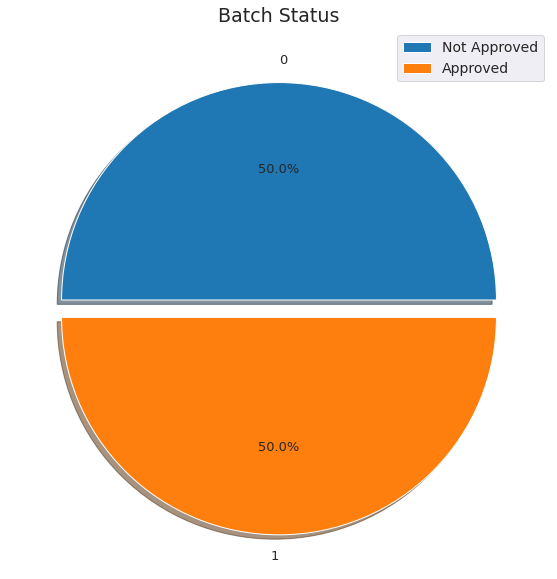

In [7]:
plt.figure(figsize=(20, 10))
df["Batch Status"].value_counts().plot(kind="pie", explode=[0, 0.08], autopct="%1.1f%%", shadow=True, fontsize=13)
plt.title("Batch status".title(), fontsize=19)
#plt.legend()
plt.gca().legend(('Not Approved','Approved'))
plt.ylabel("")
plt.savefig("images/pie_chart_batchS.png", dpi=400)
plt.show()

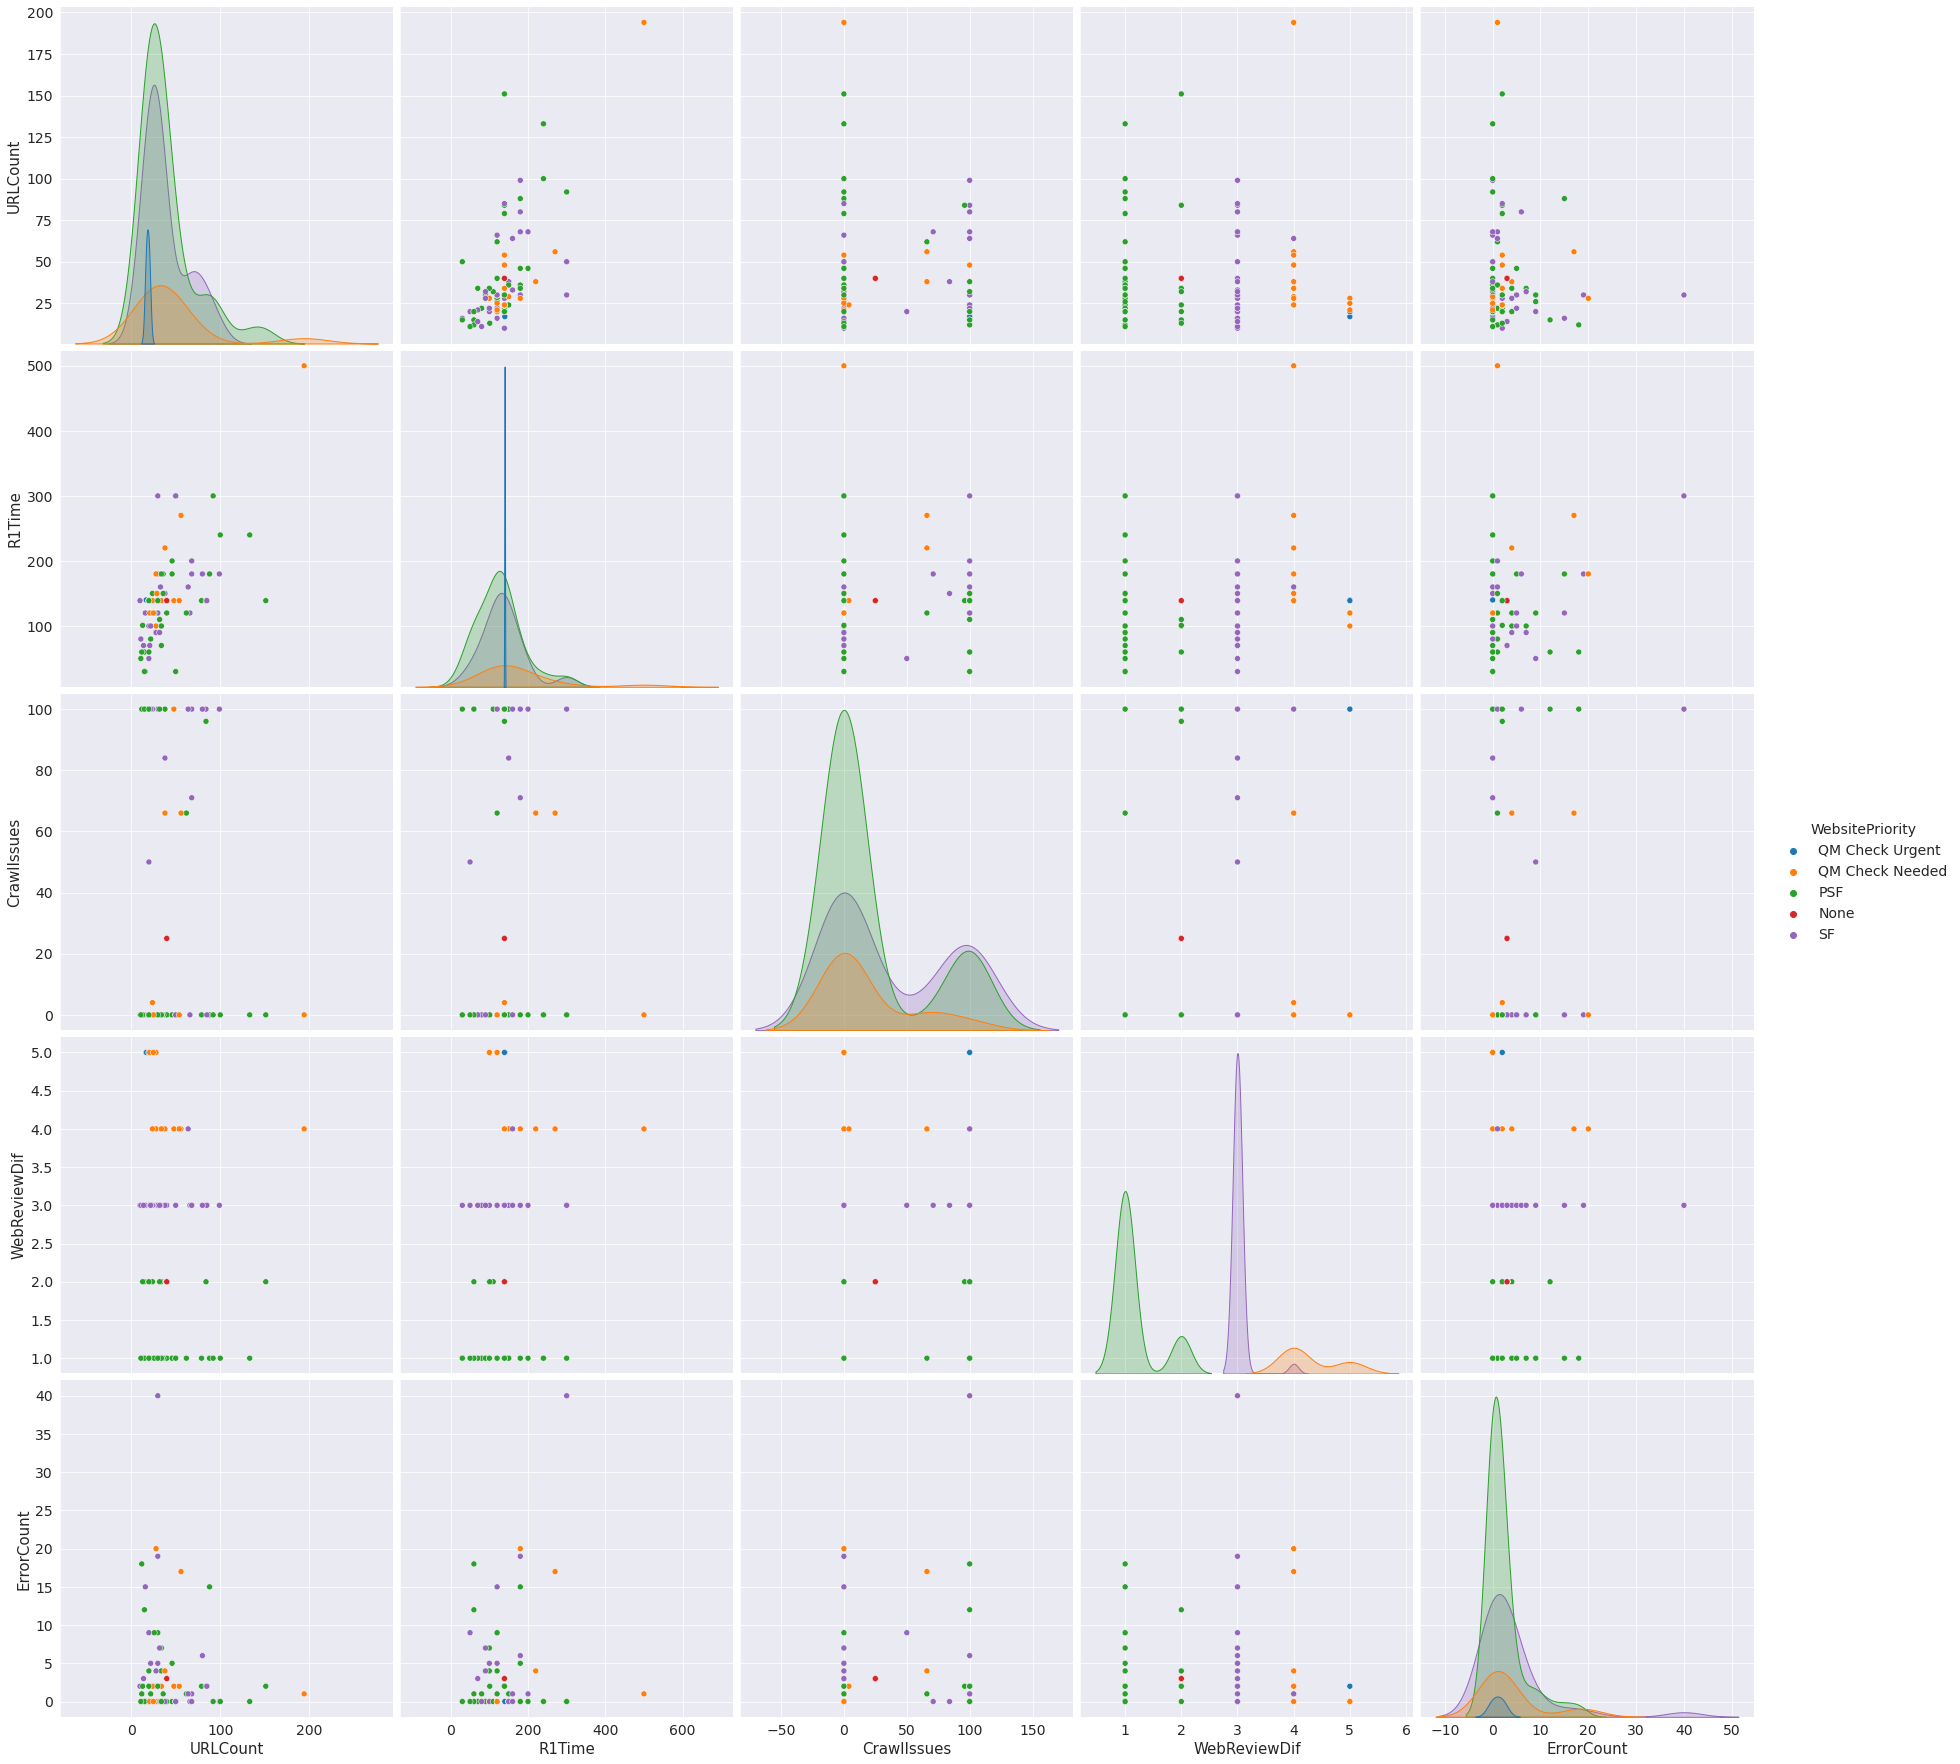

In [16]:
sns.pairplot(df[["URLCount", "R1Time", "CrawlIssues", "WebReviewDif", "ErrorCount", "WebsitePriority"]], hue ='WebsitePriority', height=5);
sns.set_context(rc={"axes.labelsize":15}, font_scale=2)
plt.savefig("images/paiplot1.png")
plt.show()  

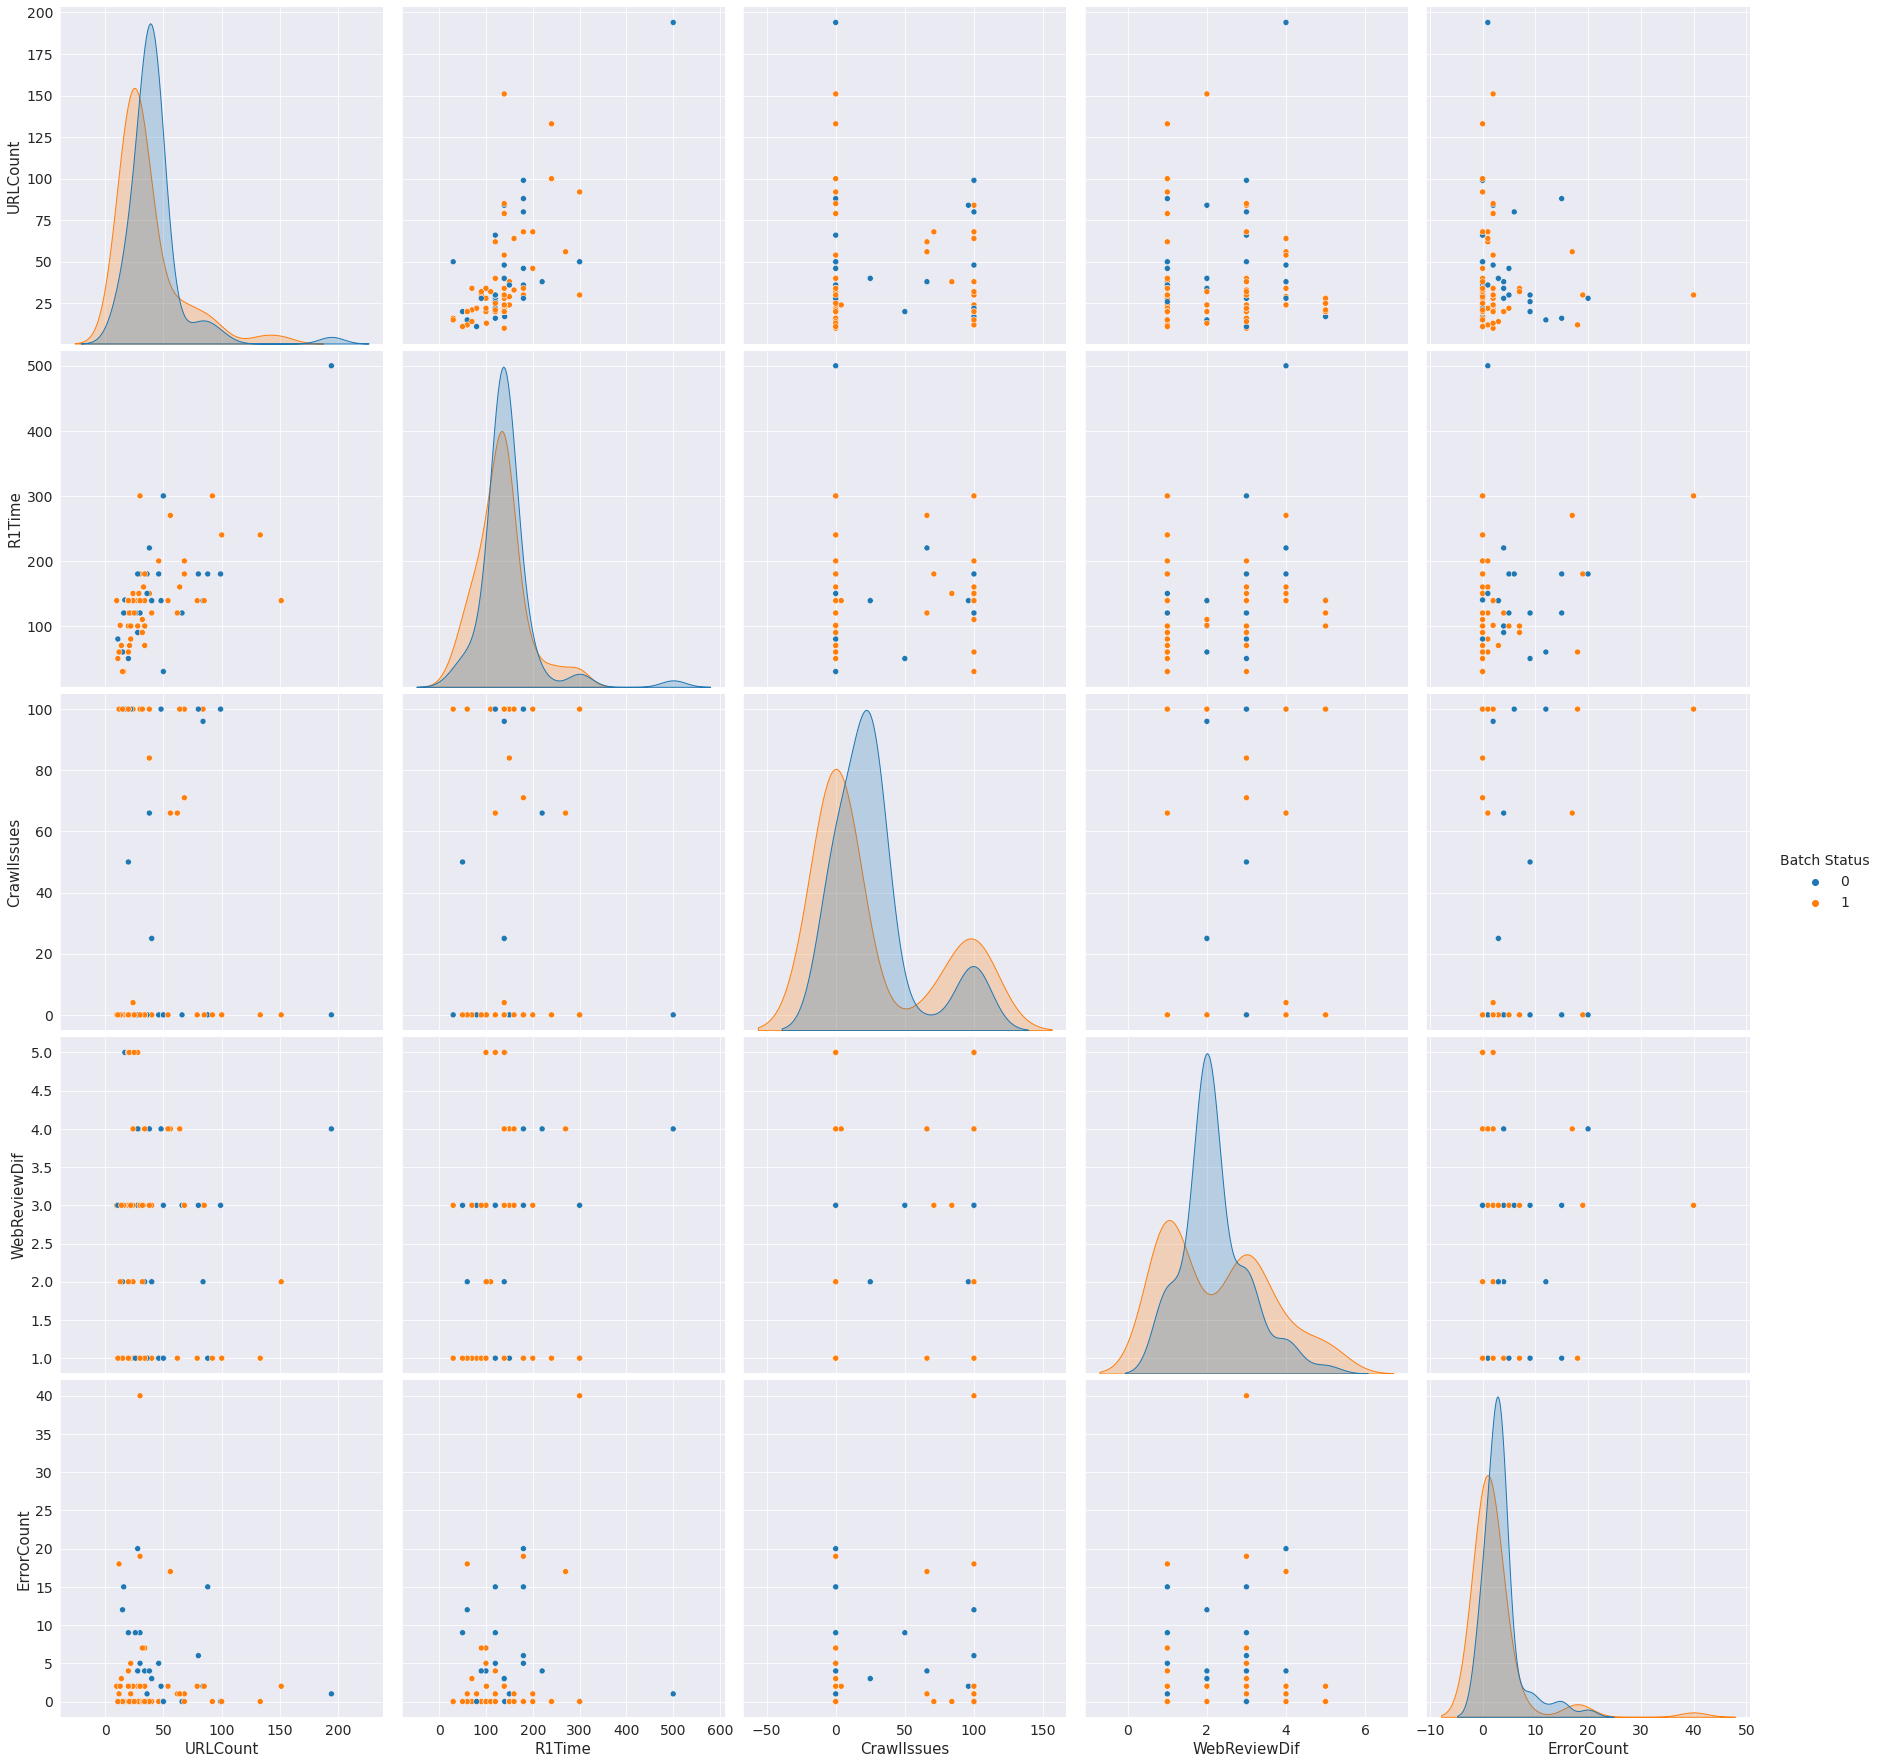

In [14]:
sns.pairplot(df[["URLCount", "R1Time", "CrawlIssues", "WebReviewDif", "ErrorCount", "Batch Status"]], hue ='Batch Status', height=5);
sns.set_context(rc={"axes.labelsize":15}, font_scale=2)
plt.savefig("images/pairplot2.png")
plt.show()  

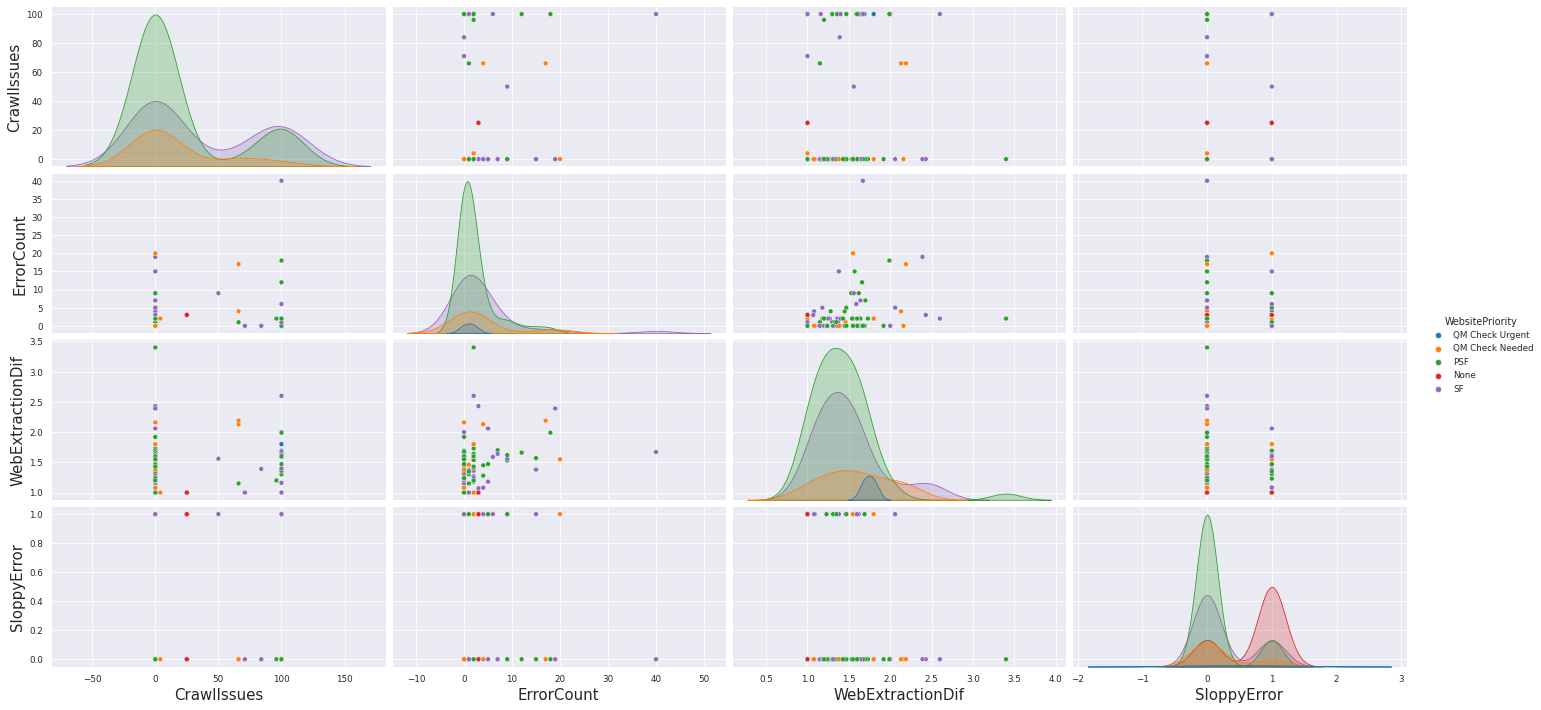

In [40]:
sns.pairplot(df[["CrawlIssues", "ErrorCount", "WebExtractionDif", "SloppyError", "WebsitePriority"]], hue ='WebsitePriority', aspect=2);
sns.set_context(rc={"axes.labelsize":15}, font_scale=2)
plt.show()  

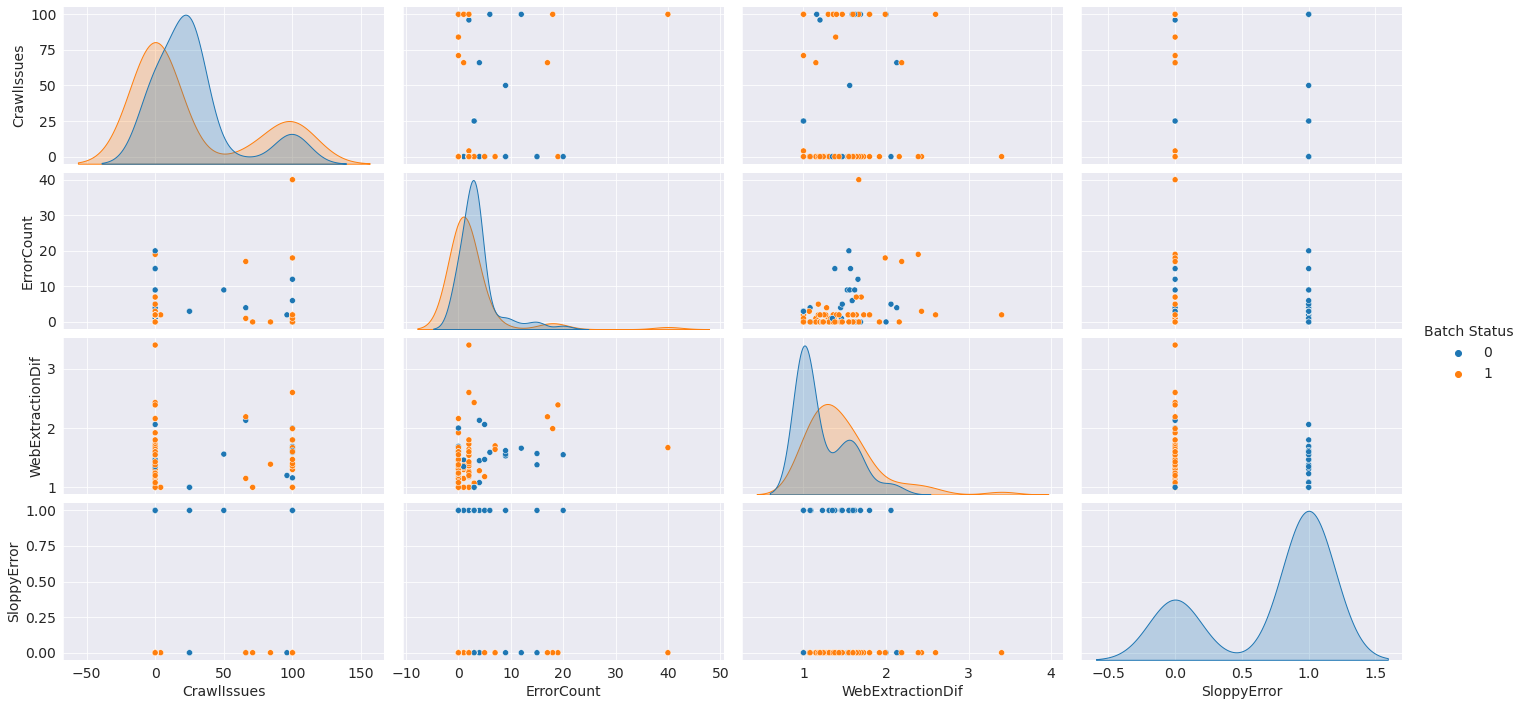

In [34]:
sns.pairplot(df[["CrawlIssues", "ErrorCount", "WebExtractionDif", "SloppyError", "Batch Status"]], hue ='Batch Status', aspect=2);
sns.set_context(rc={"axes.labelsize":15}, font_scale=2)
plt.show()  

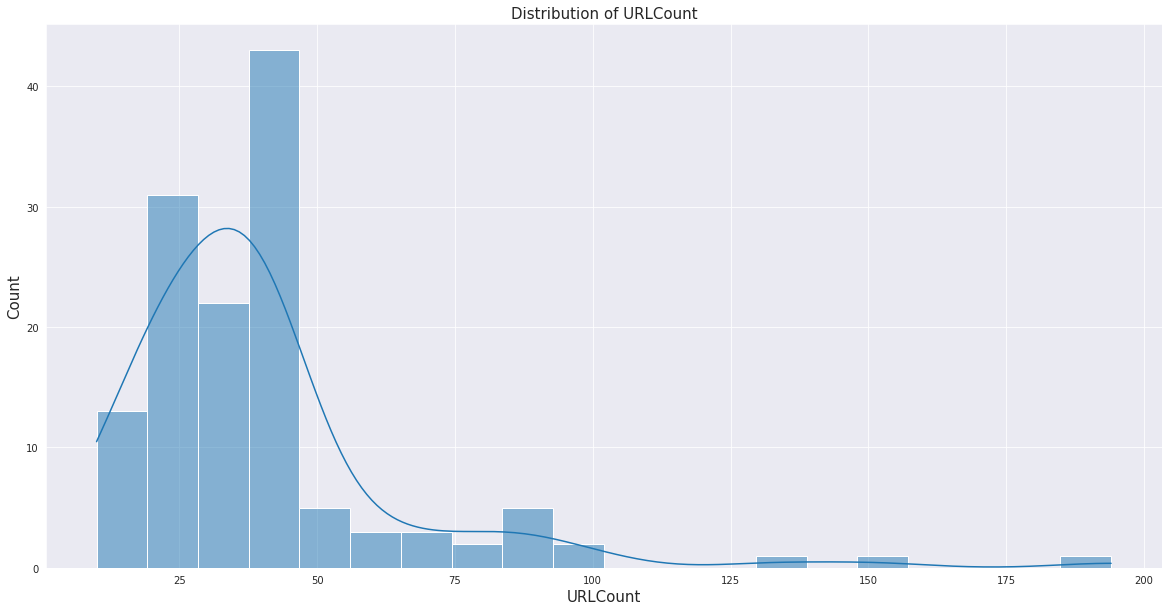

In [19]:
plt.figure(figsize=(20,10))
sns.histplot(df["URLCount"], bins=20, kde=True) #kde for density 
plt.title("Distribution of URLCount", fontsize=15)
plt.xlabel("URLCount", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

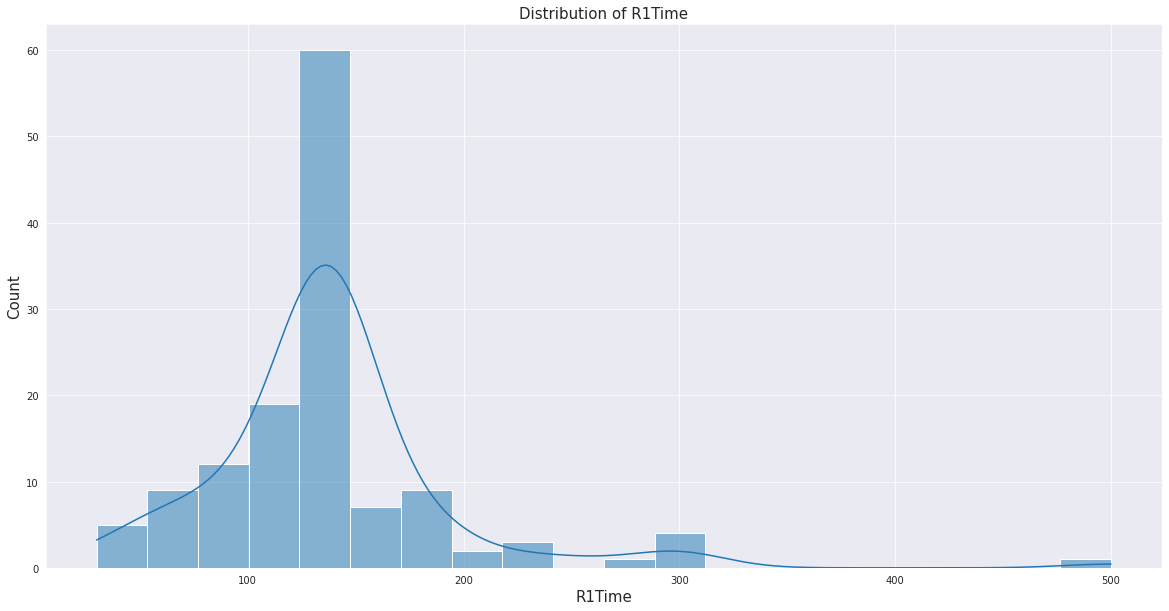

In [84]:
plt.figure(figsize=(20,10))
sns.histplot(df["R1Time"], bins=20, kde=True) #kde for density 
plt.title("Distribution of R1Time", fontsize=15)
plt.xlabel("R1Time", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

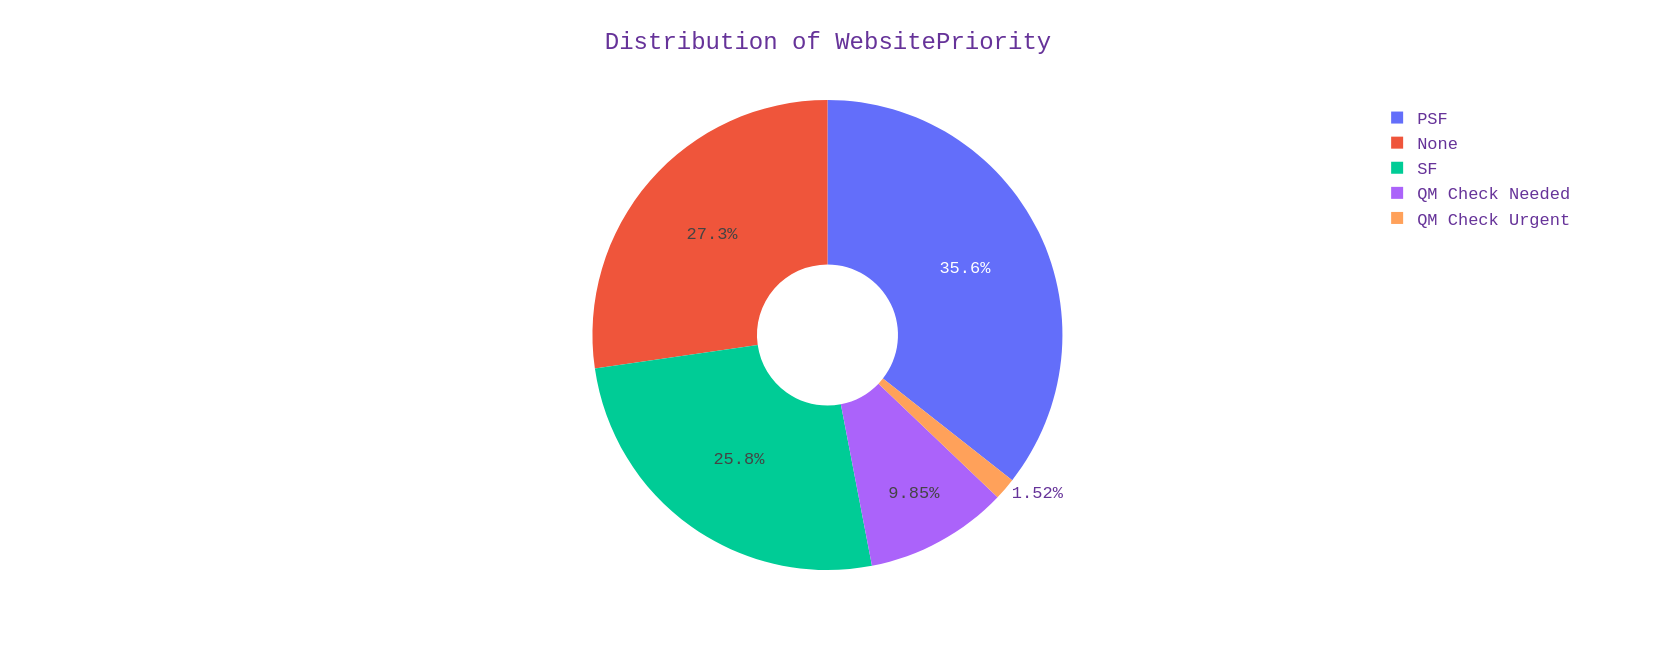

In [62]:
values = list(df.WebsitePriority.value_counts().values)
labels = list(df.WebsitePriority.value_counts().index.values) 
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])

fig.update_layout(
    title={
        'text': "Distribution of WebsitePriority",
        'y':.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        family="Courier New, monospace",
        size=17,
        color="RebeccaPurple"
    ),
    height=650,
)
fig.show()

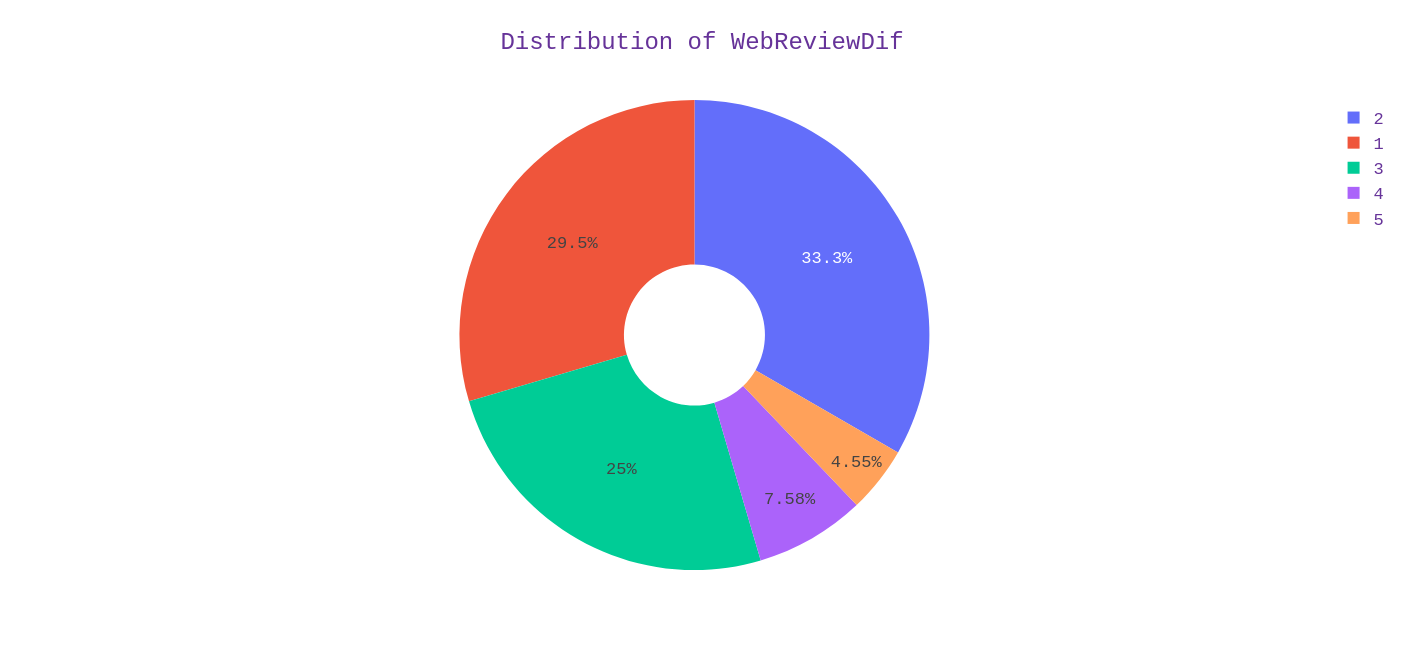

In [60]:
values = list(df.WebReviewDif.value_counts().values)
labels = list(df.WebReviewDif.value_counts().index.values) 
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])

fig.update_layout(
    title={
        'text': "Distribution of WebReviewDif",
        'y':.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        family="Courier New, monospace",
        size=17,
        color="RebeccaPurple"
    ),
    height=650,
)
fig.show()

In [7]:
def check_repeated_values(column):
    """
    """
    if(len(df[column].values) == df[column].nunique()):
        print(f"There are no repeated values in the column {column}")
    else:
        return print(f"There are repeated values in the column {column}")

In [8]:
check_repeated_values("Website")

There are no repeated values in the column Website


In [9]:
df.Month_Encoded # checar cuales pasaron en cada mes

0      3.0
1      3.0
2      3.0
3      2.0
4      0.0
      ... 
127    3.0
128    4.0
129    4.0
130    1.0
131    4.0
Name: Month_Encoded, Length: 132, dtype: float64

In [10]:
check_repeated_values("Month_Encoded")

There are repeated values in the column Month_Encoded


In [68]:
data_month = df.Month_Encoded.value_counts().to_frame().reset_index()
data_month.index = data_month.index.astype(str)
s = pd.Series(['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00'], index=[0, 1, 2, 3, 4])
data_month["color"] = s.values

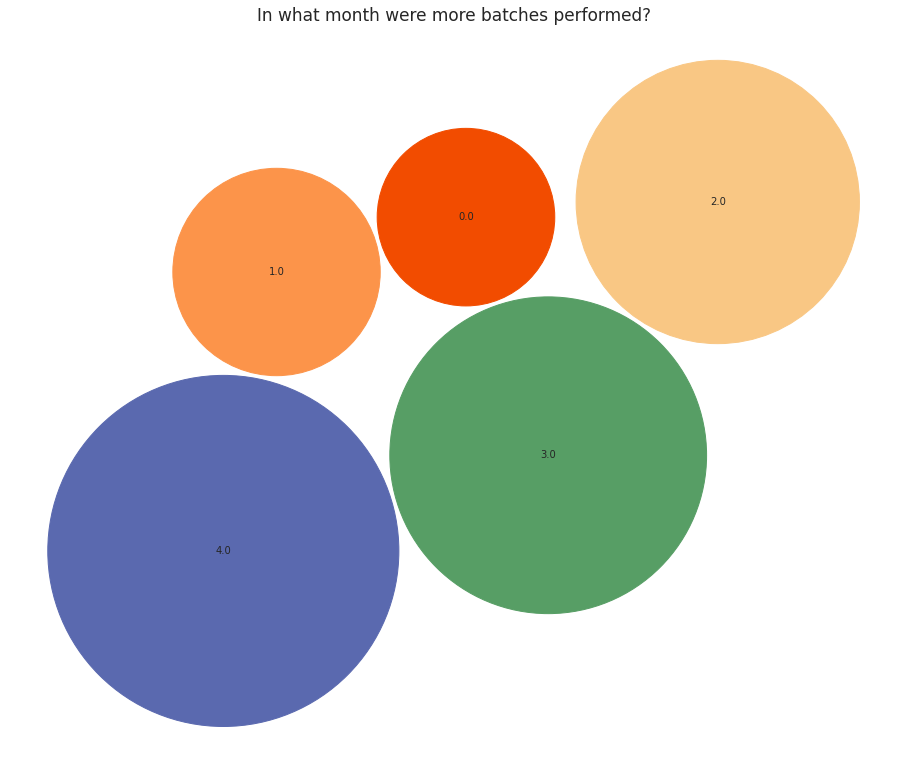

In [71]:
bubble_chart = BubbleChart(area=data_month['Month_Encoded'],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"), figsize=(16,16))
bubble_chart.plot(
    ax, data_month['index'], data_month["color"])


ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('In what month were more batches performed?', fontsize=17)

plt.show()

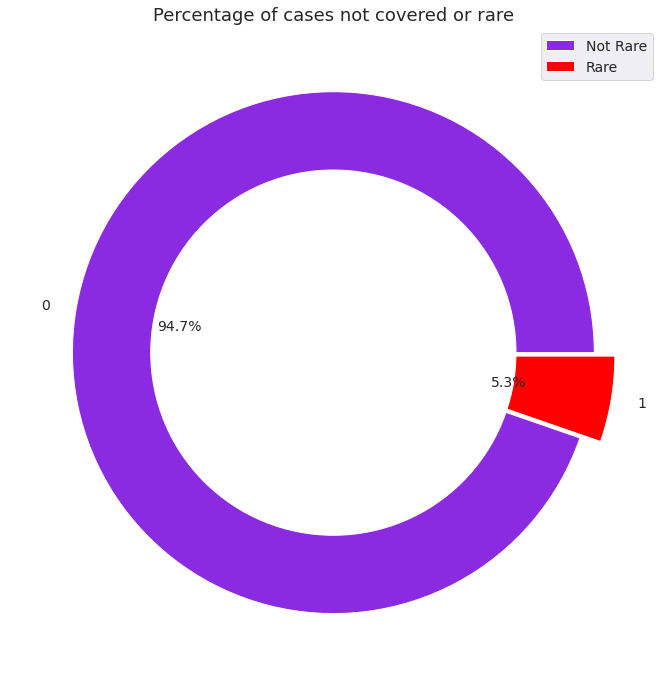

In [50]:
names = df["Other?"].value_counts().to_frame().reset_index().index.values
sizes = df["Other?"].value_counts().to_frame().reset_index()["Other?"].values

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')
 
plt.figure(figsize=(12,12))
plt.title("")
#plt.rcParams['font.size'] = 14
plt.pie(sizes, labels=names,
        wedgeprops = {'edgecolor' : 'white'},
        autopct="%1.1f%%",
        explode=[0, 0.08],
        colors=["blueviolet", "red"]
       )
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Percentage of cases not covered or rare", fontsize=18)
p.gca().legend(('Not Rare','Rare'))
plt.show()

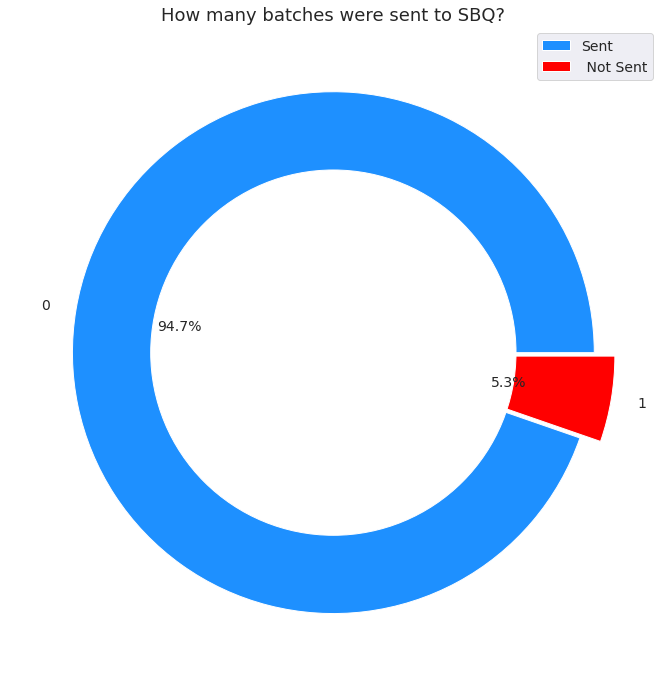

In [60]:
names = df["QMSBQ"].value_counts().to_frame().reset_index().index.values
sizes = df["QMSBQ"].value_counts().to_frame().reset_index()["QMSBQ"].values

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')
 
plt.figure(figsize=(12,12))
plt.title("")
#plt.rcParams['font.size'] = 14
plt.pie(sizes, labels=names,
        wedgeprops = {'edgecolor' : 'white'},
        autopct="%1.1f%%",
        explode=[0, 0.08],
        colors=["dodgerblue", "red"]
       )
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("How many batches were sent to SBQ?", fontsize=18)
p.gca().legend(('Sent',' Not Sent'))
plt.show()

In [57]:
data_guidance = df.IncorrectGuidance.value_counts().to_frame().reset_index()
data_guidance.index = data_guidance.index.astype(str)
c = pd.Series(['lightskyblue', '#F24C00'], index=[0, 1,])
data_guidance["color"] = c.values

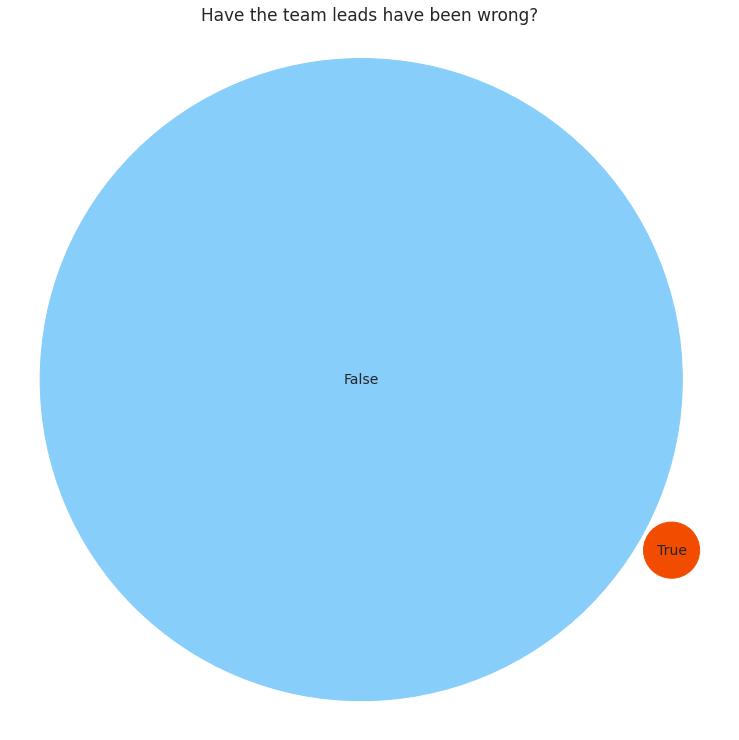

In [59]:
bubble_chart2 = BubbleChart(area=data_guidance['IncorrectGuidance'],
                           bubble_spacing=0.1)

bubble_chart2.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"), figsize=(13,13))
bubble_chart2.plot(
    ax, data_guidance['index'], data_guidance["color"])


ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Have the team leads have been wrong?', fontsize=17)

plt.savefig("images/IncorrectGuidance.png")
plt.show()

In [69]:
dd2 = df.groupby(["TeamLead_Encoded", "IncorrectGuidance"])[["URLCount"]].agg("sum").reset_index()

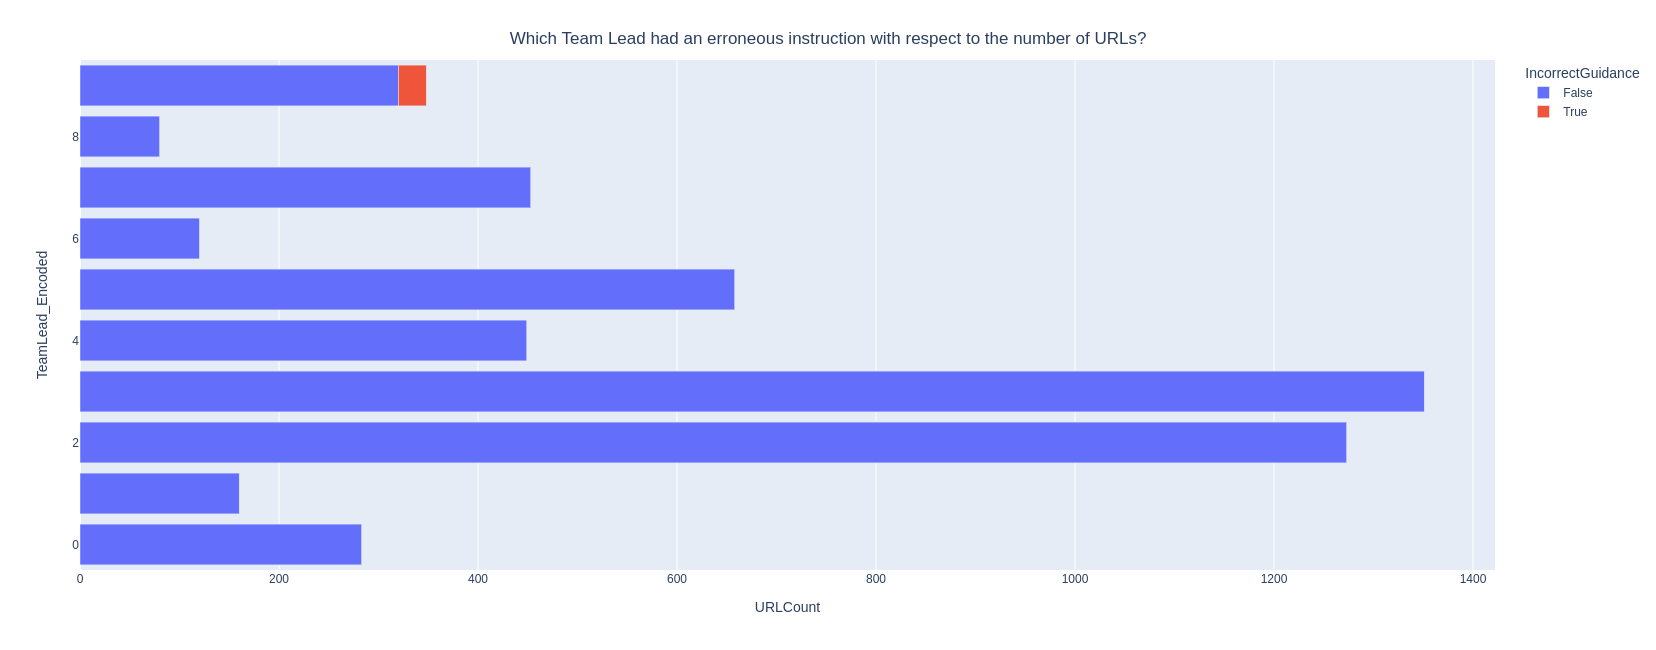

In [67]:
fig = px.bar(dd2, y="TeamLead_Encoded", x="URLCount", color="IncorrectGuidance", orientation="h")

fig.update_layout(
    title={
        'text': "Which Team Lead had an erroneous instruction with respect to the number of URLs?",
        'y':.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    height=650
)

fig.write_image("images/IncorrectGuidance_barplot.png", width=1000, height=600)
fig.show()

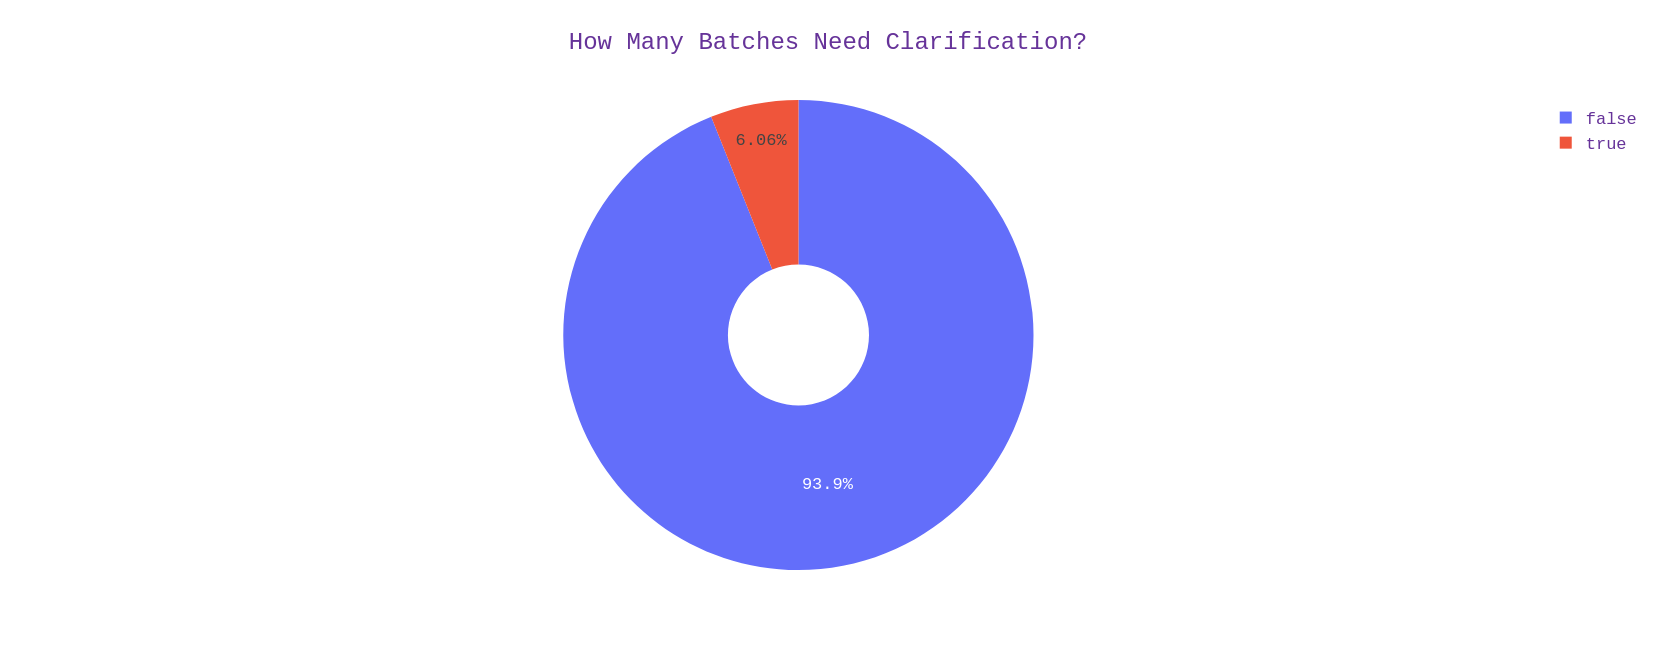

In [75]:
values = list(df.CxPending.value_counts().values)
labels = list(df.CxPending.value_counts().index.values) 
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])

fig.update_layout(
    title={
        'text': "how many batches need clarification?".title(),
        'y':.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        family="Courier New, monospace",
        size=17,
        color="RebeccaPurple"
    ),
    height=650,
)
fig.show()

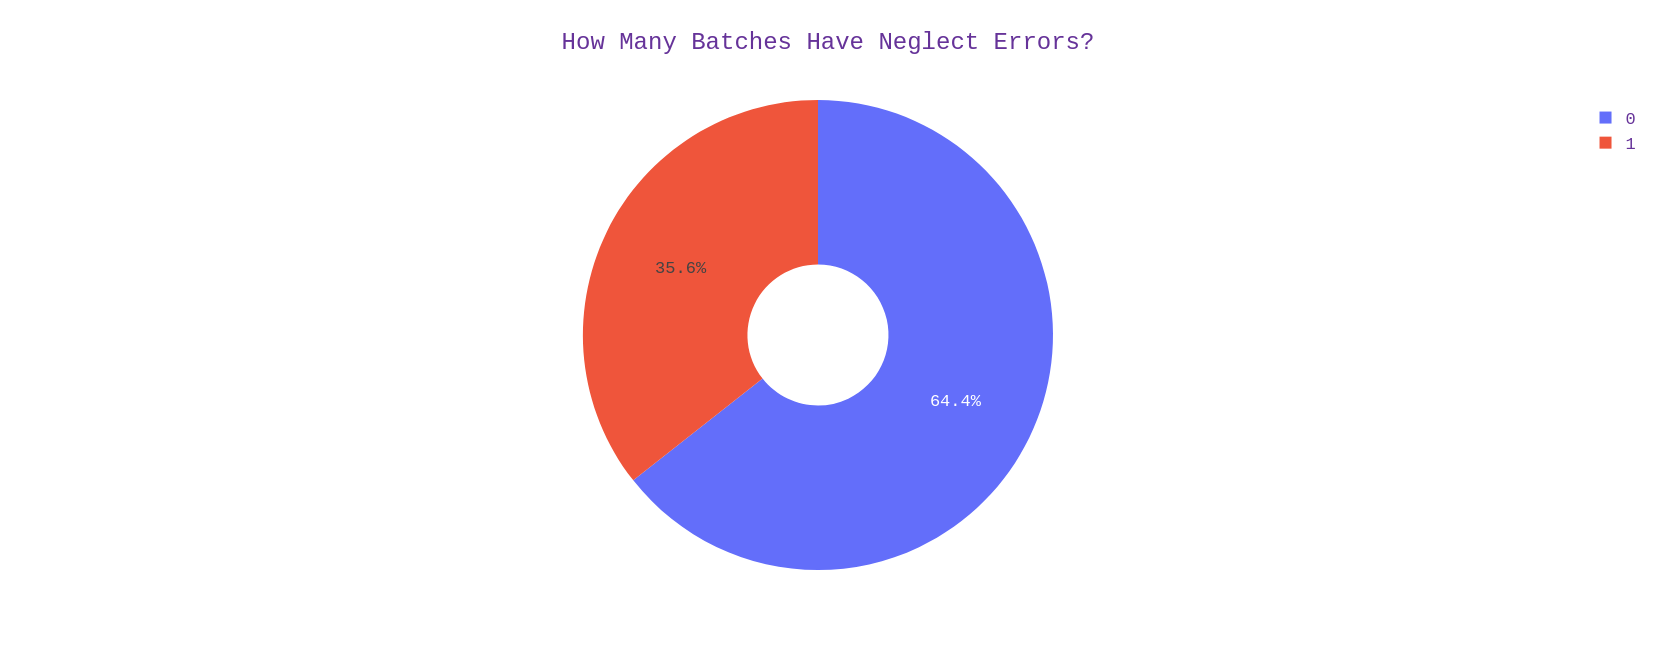

In [71]:
values = list(df.SloppyError.value_counts().values)
labels = list(df.SloppyError.value_counts().index.values) 
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])

fig.update_layout(
    title={
        'text': "How many batches have neglect errors?".title(),
        'y':.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        family="Courier New, monospace",
        size=17,
        color="RebeccaPurple"
    ),
    height=650,
)
fig.show()

In [76]:
df[df["SloppyError"] == 1]

DateReceived                  Website  URLCount  R1Time  CrawlIssues  \
0     10/18/2021            deerstags.com        17     140          100   
1     10/18/2021          mgchemicals.com       194     500            0   
4            NaT           manicpanic.com        40     139           25   
7      9/27/2021  shop.westerndigital.com        48     139          100   
8     10/25/2021                apple.com        30     120            0   
11           NaT                vaude.com        40     139           25   
13           NaT              bedhead.com        40     139           25   
18           NaT           homefashion.de        40     139           25   
19           NaT             krups.com.pl        40     139           25   
21           NaT               rowenta.pl        40     139           25   
25           NaT                natrol.pk        40     139           25   
27           NaT          loreal-paris.de        40     139           25   
29    10/11/2021        int.safety1st.com        66     120            0   
34           NaT             burtsbees.fr        40     139           25   
40    10/27/2021           deconovo.co.uk        36     180            0   
41           NaT     coversforthehome.com        40     139           25   
42           NaT        shop.antenled.com        40     139           25   
43           NaT          irisusainic.com        40     139           25   
46           NaT              hape.com_uk        40     139           25   
49     9/28/2021                 oppo.com        30     120            0   
51           NaT            fairytrees.de        40     139           25   
60           NaT                 gabel.it        40     139           25   
62    11/11/2021        crcindustries.com        20      50           50   
64     11/8/2021            aigostore.com        26     120            0   
65     11/9/2021              boytone.com        16     120            0   
66           NaT                 grohe.pl        40     139           25   
67           NaT           cathayhome.com        40     139           25   
68     11/1/2021          tpnailscare.com        28      90            0   
69           NaT              corsair.com        40     139           25   
73    10/24/2021             muselash.com        15      60            0   
74     10/4/2021               vogels.com        46     180            0   
82     10/3/2021              whiskas.com        50      30            0   
87    10/14/2021            shopdoona.com        22     120          100   
88           NaT                tapiso.de        40     139           25   
90    10/20/2021     seidenblumen-ross.de        36     150            0   
96    10/11/2021        littletikes.co.uk        80     180          100   
97           NaT            beauticom.com        40     139           25   
98           NaT          drbvitamins.com        40     139           25   
99     11/8/2021           crossbeats.com        50     300            0   
106          NaT               sigikid.de        40     139           25   
108          NaT               momeni.com        40     139           25   
111          NaT             maxxhaul.com        40     139           25   
112   10/25/2021            carpetcity.de        28     180            0   
113   10/11/2021            newbalance.es        50     300            0   
117          NaT         jack-wolfskin.de        40     139           25   
120          NaT               lipton.com        40     139           25   
121          NaT            smartwool.com        40     139           25   

     WebReviewDif  WebsitePriority  ErrorCount  R2Time  TeamLeadSBQ  ...  \
0               5  QM Check Urgent           0      71            0  ...   
1               4  QM Check Needed           1     190            0  ...   
4               2             None           3      71            0  ...   
7               4  QM Check Needed           2     

In [75]:
df.groupby(["WebsitePriority"])[["SloppyError"]].count()

SloppyError
WebsitePriority             
None                      36
PSF                       47
QM Check Needed           13
QM Check Urgent            2
SF                        34

In [ ]:
df.WebsitePriority

In [4]:
df_ts1 = df[df["DateReceived"] != "NaT"]
df_ts = pd.to_datetime(df_ts1.DateReceived).value_counts().to_frame().reset_index().sort_values(by="index", ascending=True)

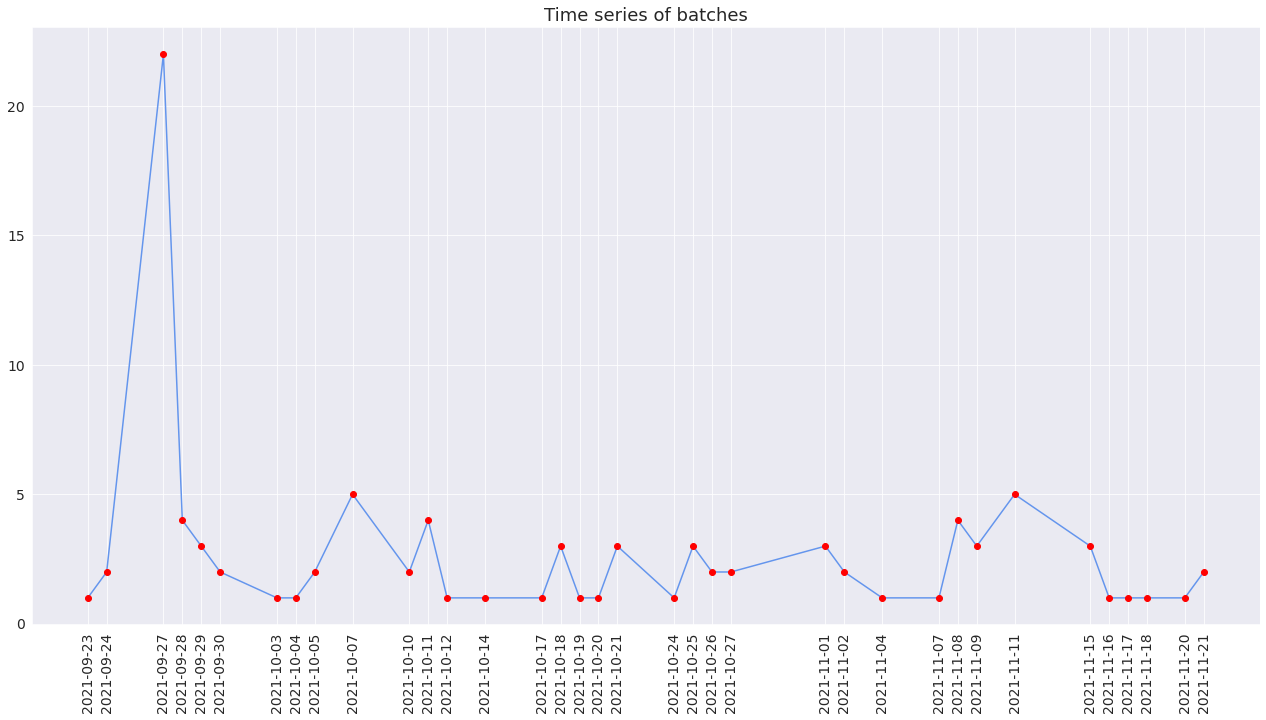

In [6]:
plt.figure(figsize=(22,11))
plt.plot(df_ts["index"], df_ts["DateReceived"], color="cornflowerblue")
plt.plot(df_ts["index"], df_ts["DateReceived"], "o", color="red")
plt.title("Time series of batches", fontsize=18)
plt.ylabel("")
plt.xticks(df_ts["index"],rotation=90)
plt.savefig("images/time_series.png", dpi=400)
plt.show()

In [7]:
df_ts1.DateReceived = pd.to_datetime(df_ts1.DateReceived)

/tmp/ipykernel_3177/1531073490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts1.DateReceived = pd.to_datetime(df_ts1.DateReceived)


In [8]:
df_new = df_ts1.groupby(("DateReceived"))[["Batch Status"]].sum()

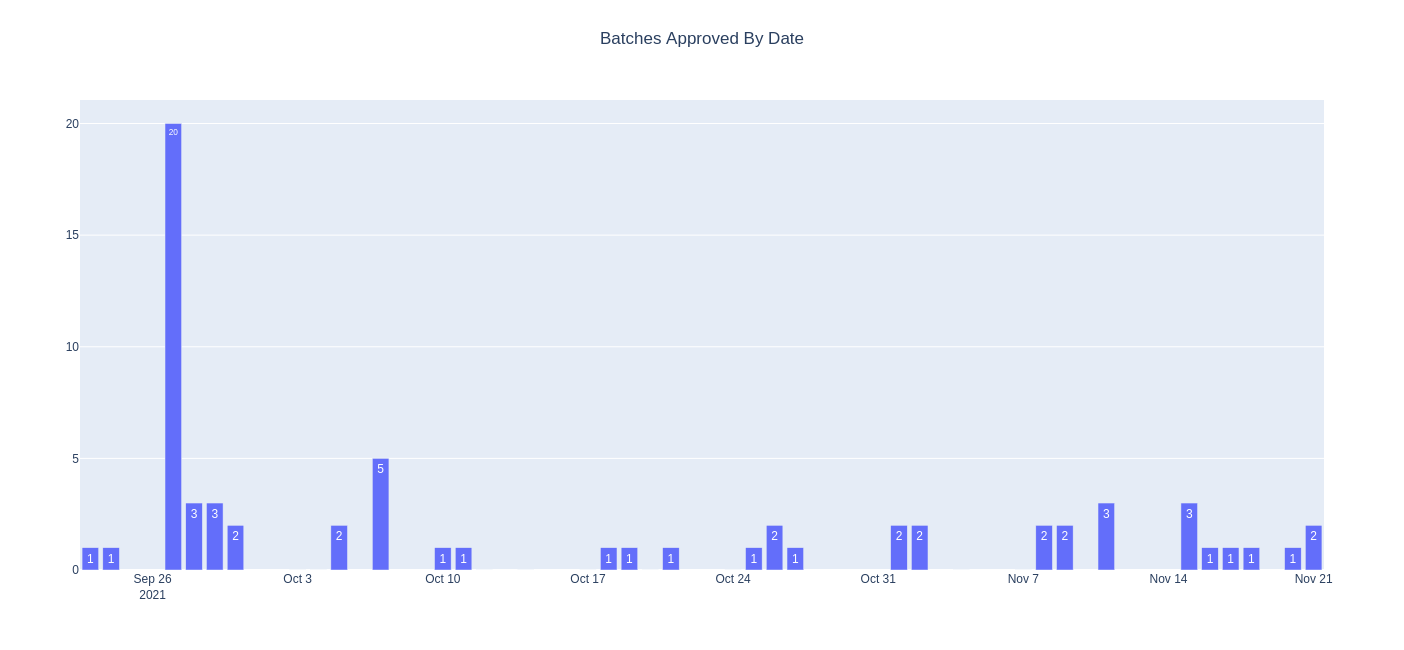

In [9]:
x = df_new.index.values
y = df_new["Batch Status"].values

# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=y,
            textposition='auto',
        )])


fig.update_layout(
    title={
        'text': "Batches approved by date".title(),
        'y':.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    height=650
)

fig.write_image("images/batches_apbd.png", width=1000, height=600)
fig.show()

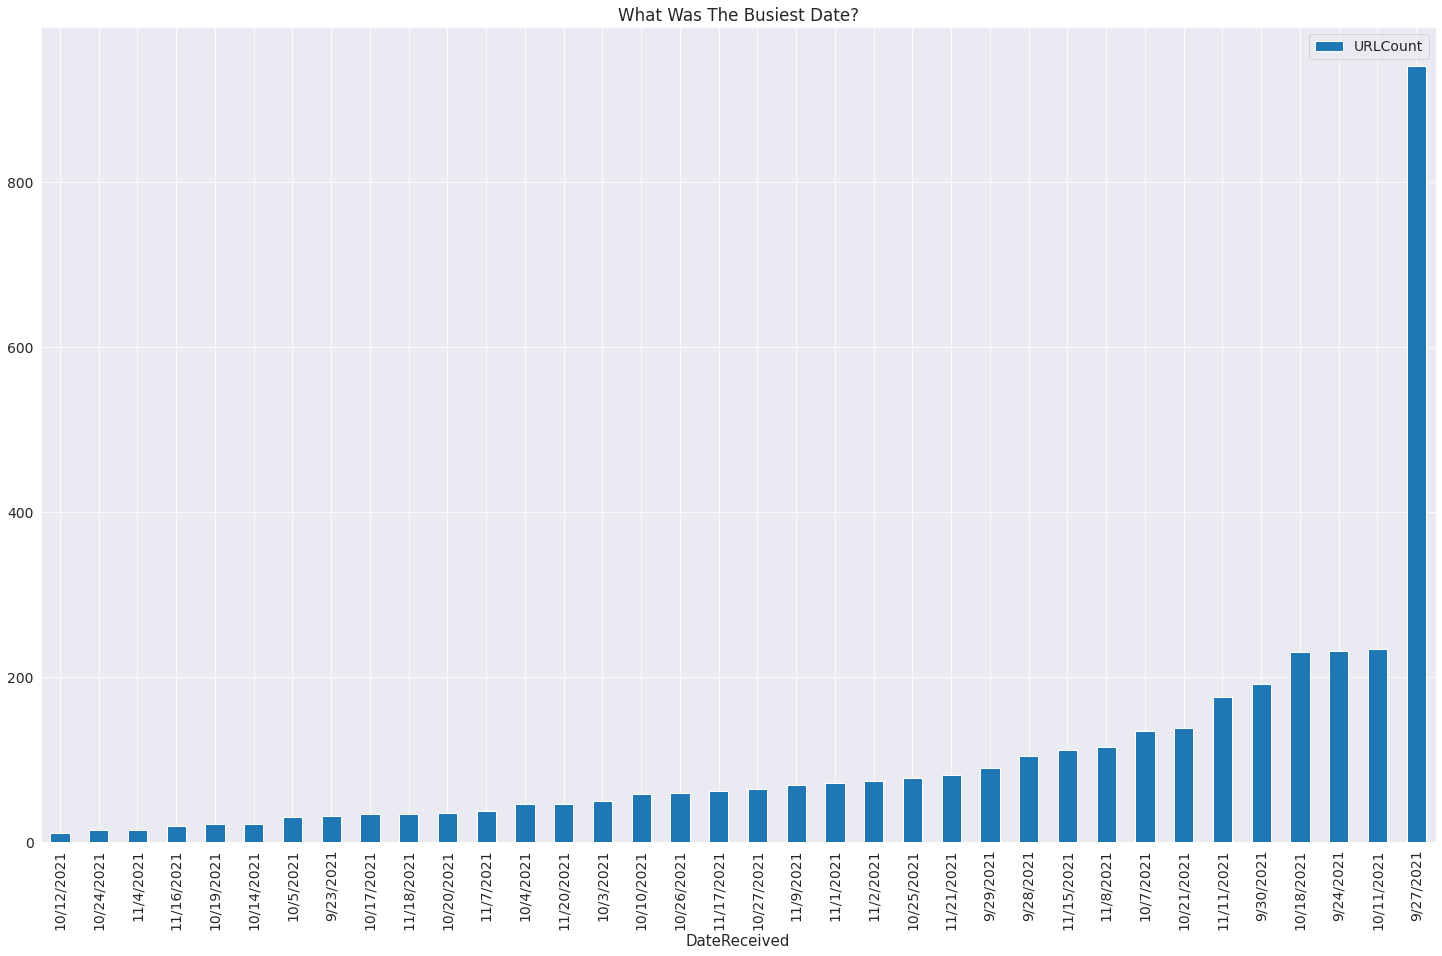

In [208]:
dd3 = df_ts1.groupby("DateReceived")[["URLCount"]].sum().sort_values(by="URLCount")
dd3.plot(kind="bar", figsize=[25,15])
plt.title("What was the busiest date?".title())
plt.legend()
plt.show()

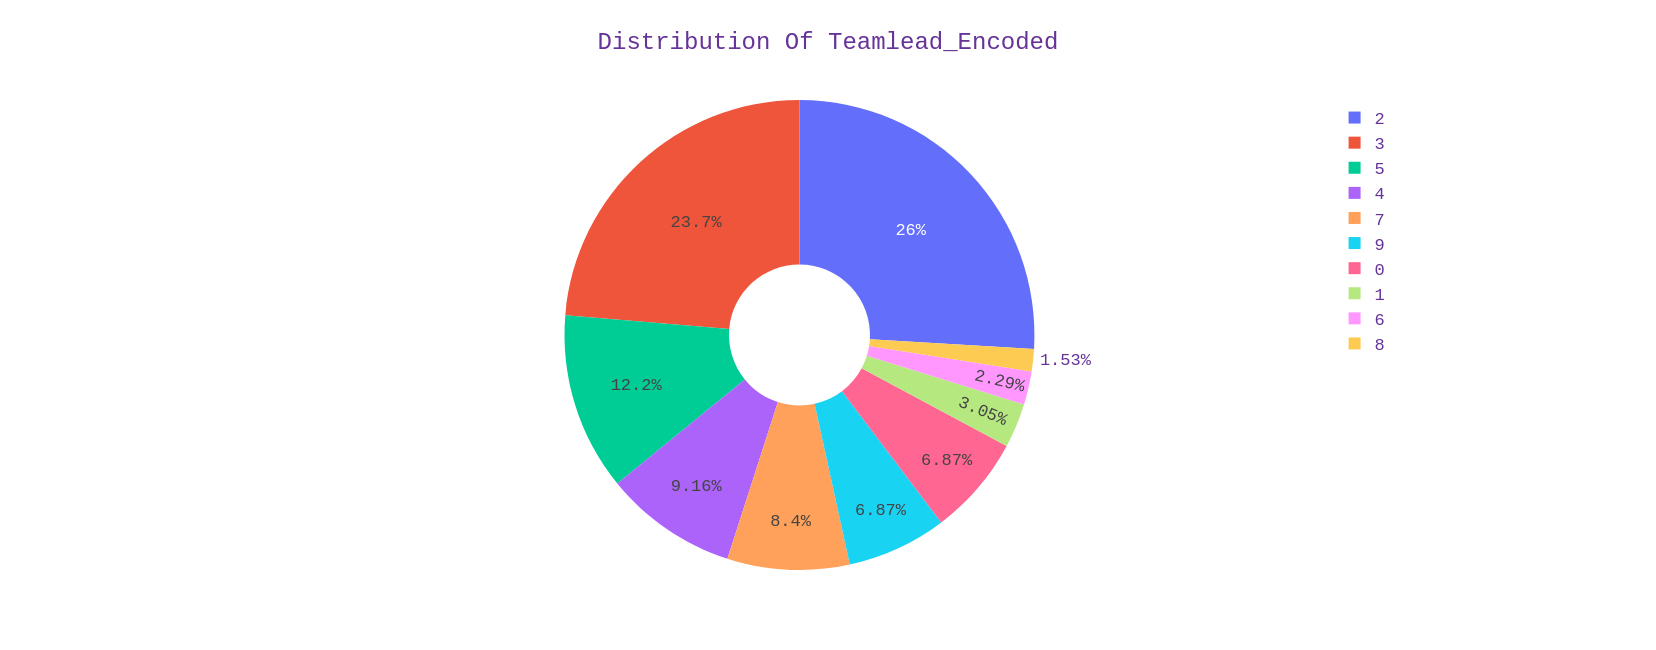

In [228]:
values = list(df["TeamLead_Encoded"].value_counts().values)
labels = list(df["TeamLead_Encoded"].value_counts().index.values) 
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])

fig.update_layout(
    title={
        'text': "Distribution of TeamLead_Encoded".title(),
        'y':.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        family="Courier New, monospace",
        size=17,
        color="RebeccaPurple"
    ),
    height=650,
)
fig.show()

In [36]:
batch_passed = df[df["Batch Status"] == 1]
batch_denied = df[df["Batch Status"] == 0]
display(batch_passed.shape, batch_denied.shape)
leads_with_passed = batch_passed.TeamLead_Encoded.unique()
leads_with_denied = batch_denied.TeamLead_Encoded.unique()
leads = df.TeamLead_Encoded.unique()
display("The leads without passed:", [lead for lead in leads if not lead in leads_with_passed])
display("The leads without denied:", [lead for lead in leads if not lead in leads_with_denied])

(66, 41)

(66, 41)

'The leads without passed:'

[1.0, nan, 6.0, 8.0]

'The leads without denied:'

[nan]

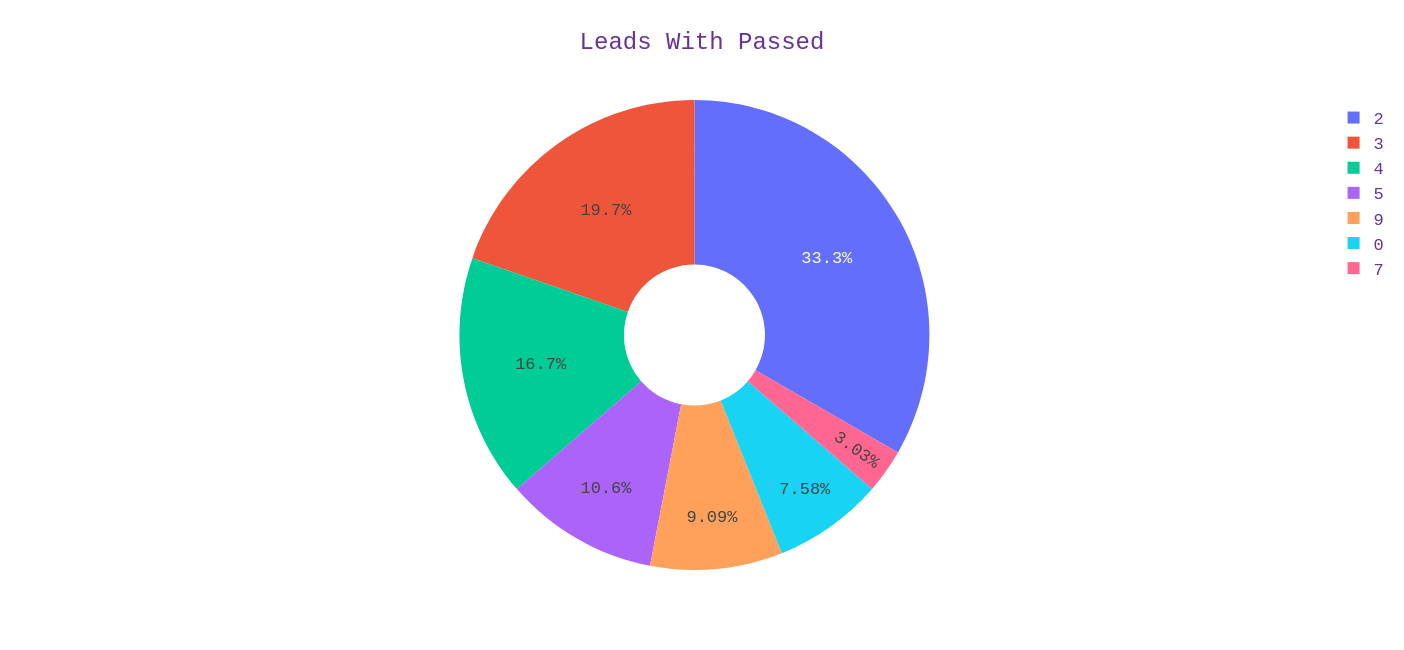

In [42]:
values = list(batch_passed["TeamLead_Encoded"].value_counts().values)
labels = list(batch_passed["TeamLead_Encoded"].value_counts().index.values) 
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])

fig.update_layout(
    title={
        'text': "Leads with passed".title(),
        'y':.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        family="Courier New, monospace",
        size=17,
        color="RebeccaPurple"
    ),
    height=650,
)
fig.show()

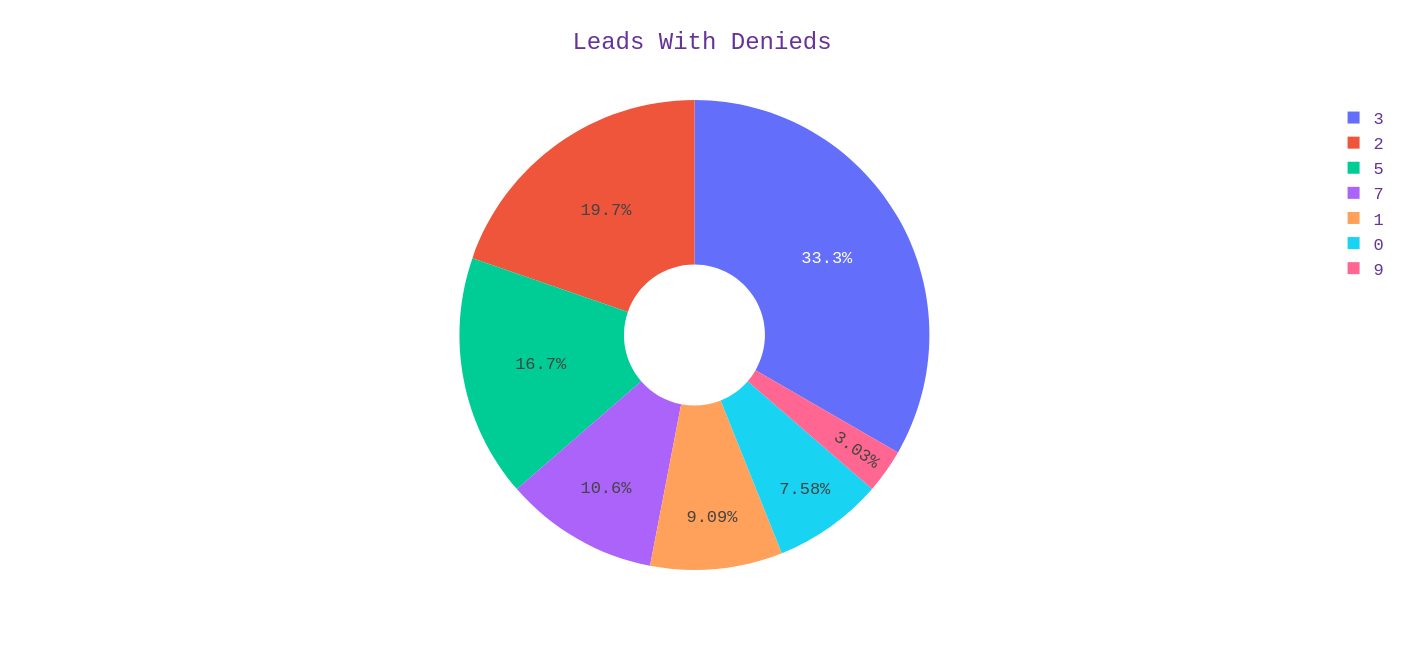

In [44]:
values = list(batch_passed["TeamLead_Encoded"].value_counts().values)
labels = list(batch_denied["TeamLead_Encoded"].value_counts().index.values) 
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])

fig.update_layout(
    title={
        'text': "Leads with denieds".title(),
        'y':.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        family="Courier New, monospace",
        size=17,
        color="RebeccaPurple"
    ),
    height=650,
)
fig.show()

In [176]:
df_website = df.groupby(["Website"])[["URLCount", "R1Time", "CrawlIssues", "WebReviewDif"]].sum()

In [177]:
df_website = df_website.sort_values(["URLCount", "R1Time", "CrawlIssues", "WebReviewDif"], ascending=False)

In [178]:
# a partir de que numero de urlcount un batch empieza a tener dificultades 
df_website

URLCount  R1Time  CrawlIssues  WebReviewDif
Website                                                     
mgchemicals.com       194     500            0             4
logitech.com          151     139            0             2
zotac.com             133     240            0             1
babysoyusa.com        100     240            0             1
renogy.com             99     180          100             3
...                   ...     ...          ...           ...
adaxiarts.com          12      60          100             1
comeap.com             12      60            0             1
laprairie.com          11      80            0             3
gurunanda.com          11      50            0             1
ecovacs.com            10     139            0             3

[132 rows x 4 columns]

In [10]:
#df_test = df.groupby(pd.cut(df["CrawlIssues"], [0, 50, 100, 150, np.inf], right=False)).sum()
df_test = df.groupby(pd.cut(df['CrawlIssues'], [0,50,100,150, np.inf], right=False))[["URLCount"]].sum()

In [51]:
df_test

URLCount
CrawlIssues             
[0.0, 50.0)         4031
[50.0, 100.0)        366
[100.0, 150.0)       818
[150.0, inf)           0

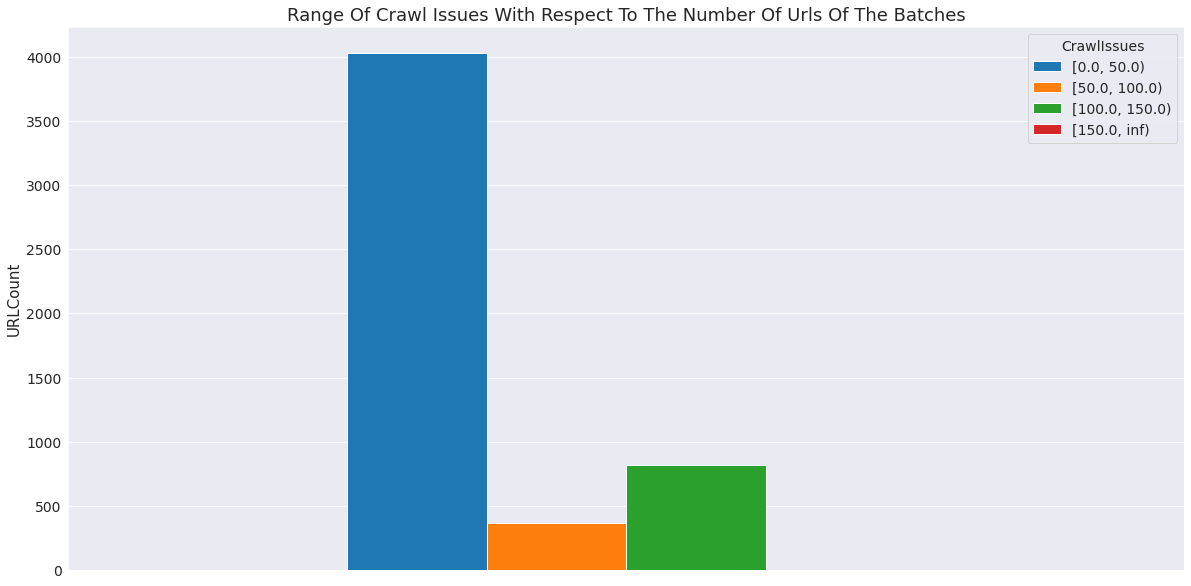

In [56]:
df_test.T.plot(kind="bar", figsize=[20,10])
plt.title("Range of Crawl Issues with respect to the number of URLs of the Batches".title(), fontsize=18)
plt.xticks([])
plt.ylabel("URLCount", fontsize=15)
plt.savefig("images/crawlissues_range.png")
plt.show()

In [115]:
def about_qatlqm(column, person):
    """
    """
    df_fbars = df.groupby(person)[["URLCount", "CrawlIssues", "WebReviewDif", "TotalSBQ", "TeamLeadSBQ", "UC", "IPQ", "SloppyError", "Batch Status"]].sum()
    values = df_fbars[column].sort_values()
    plt.figure(figsize=(20,12))
    values.plot(kind="bar")
    plt.title(f"which {person} has the hightest number of {column}")
    #plt.ylabel(column)
    plt.show()

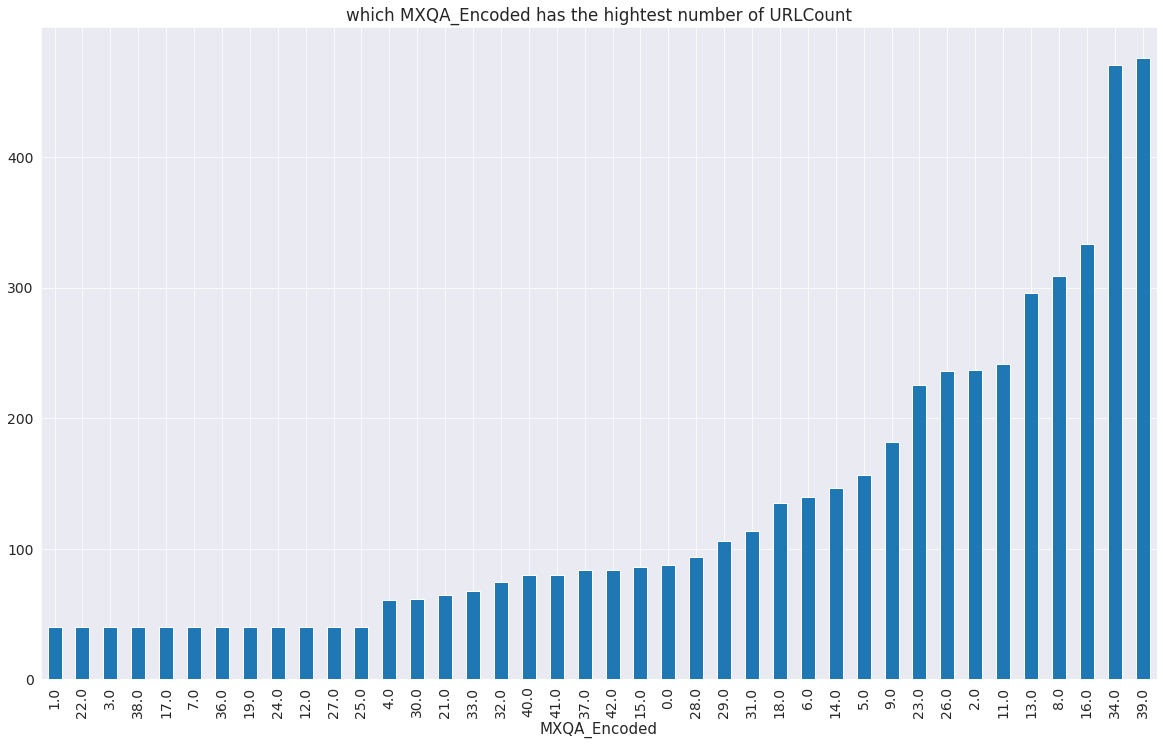

In [116]:
about_qatlqm("URLCount", "MXQA_Encoded")

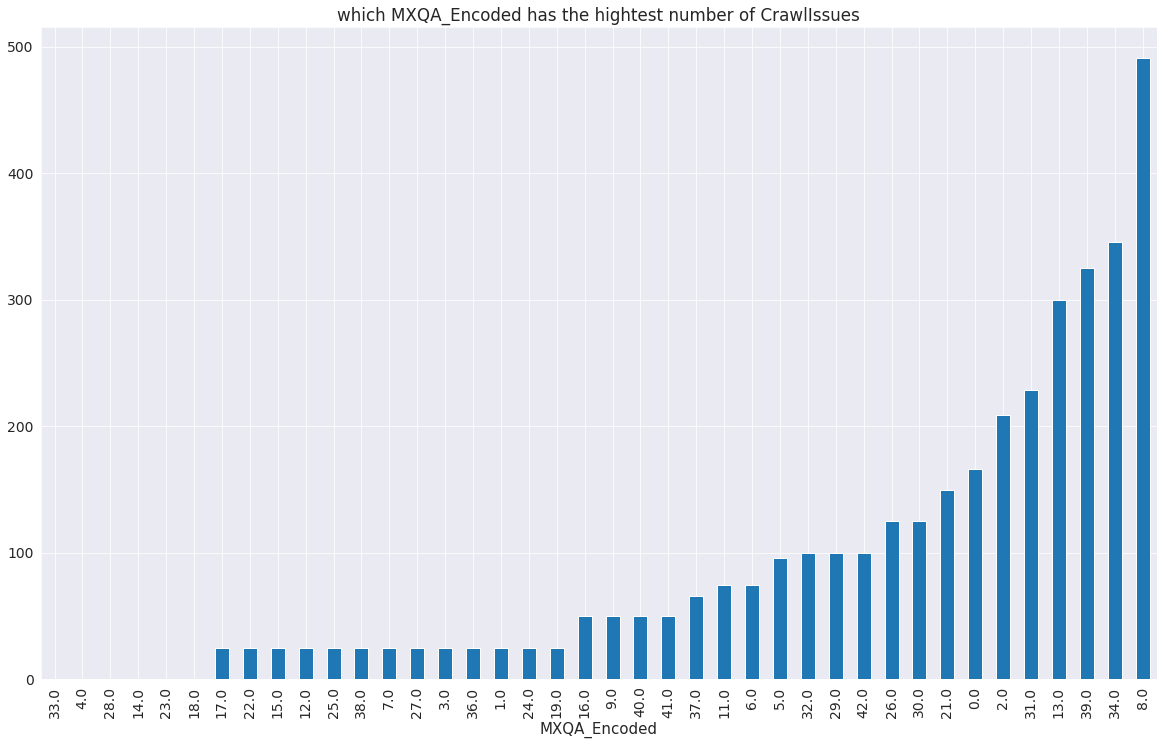

In [117]:
about_qatlqm("CrawlIssues", "MXQA_Encoded")

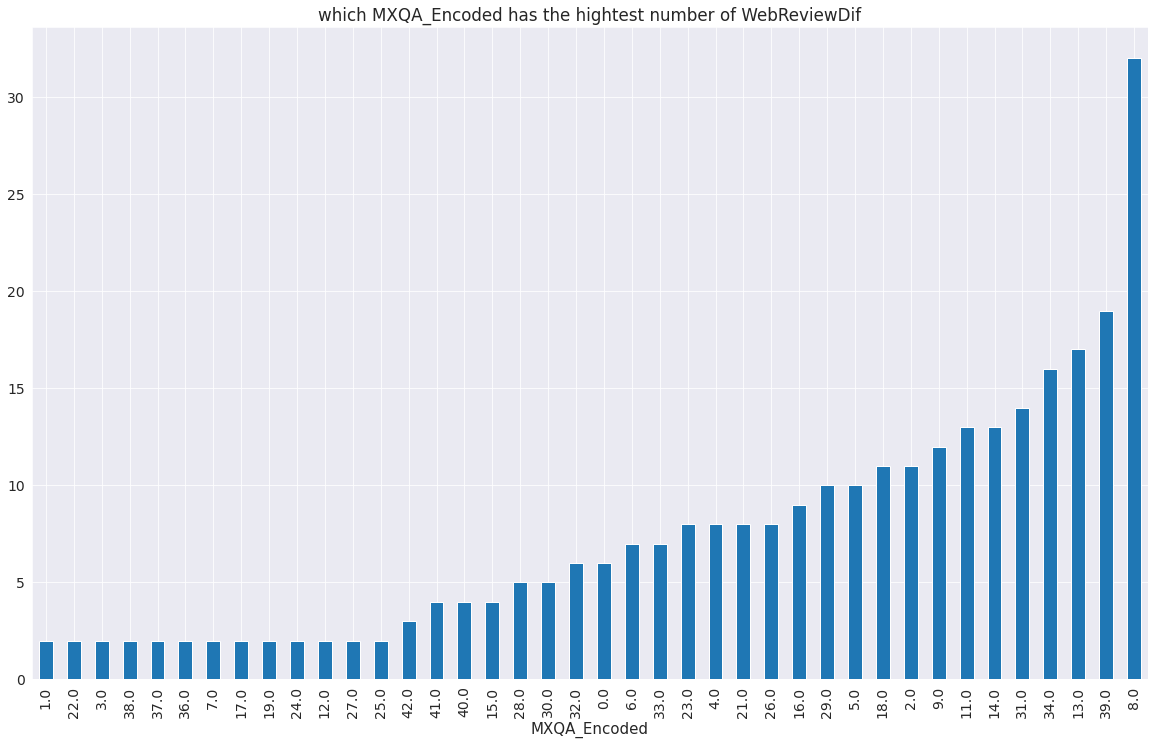

In [118]:
about_qatlqm("WebReviewDif", "MXQA_Encoded")

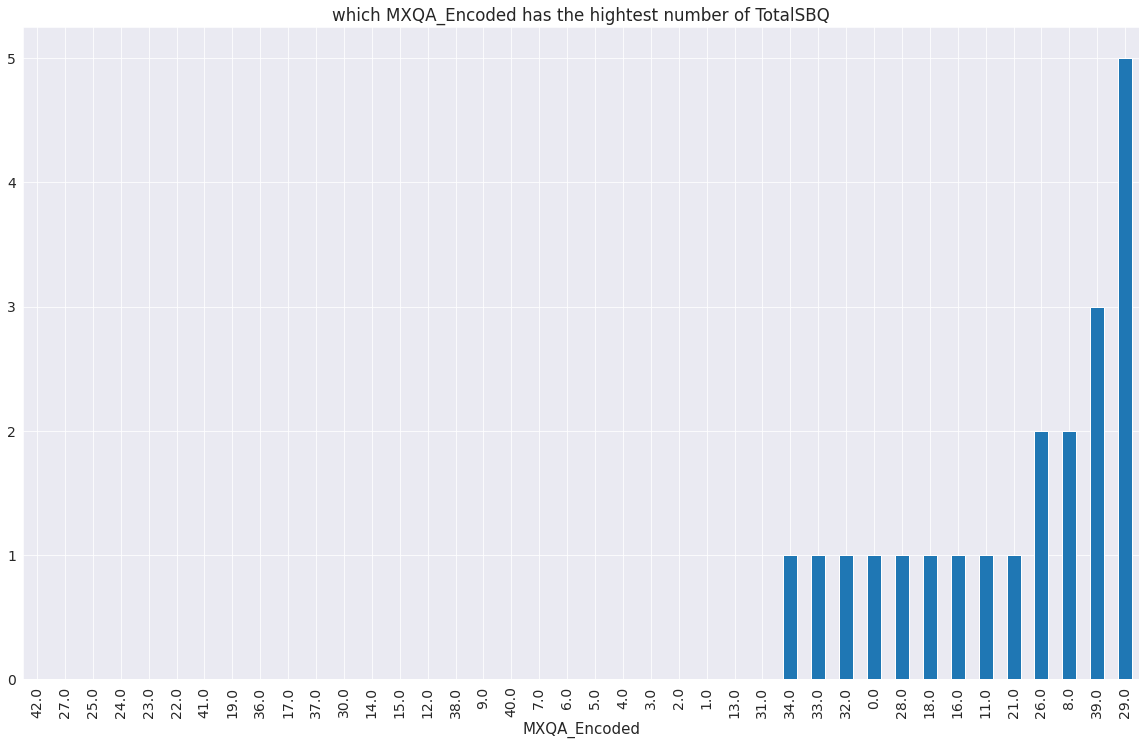

In [119]:
about_qatlqm("TotalSBQ", "MXQA_Encoded")

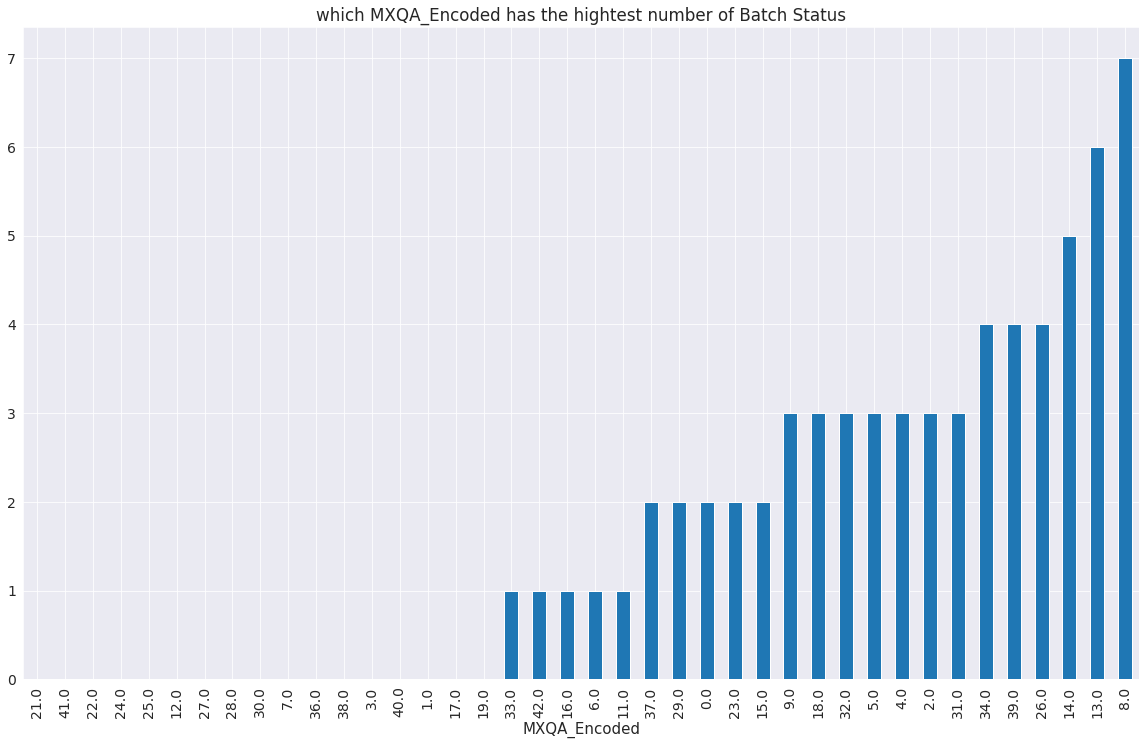

In [120]:
about_qatlqm("Batch Status", "MXQA_Encoded")

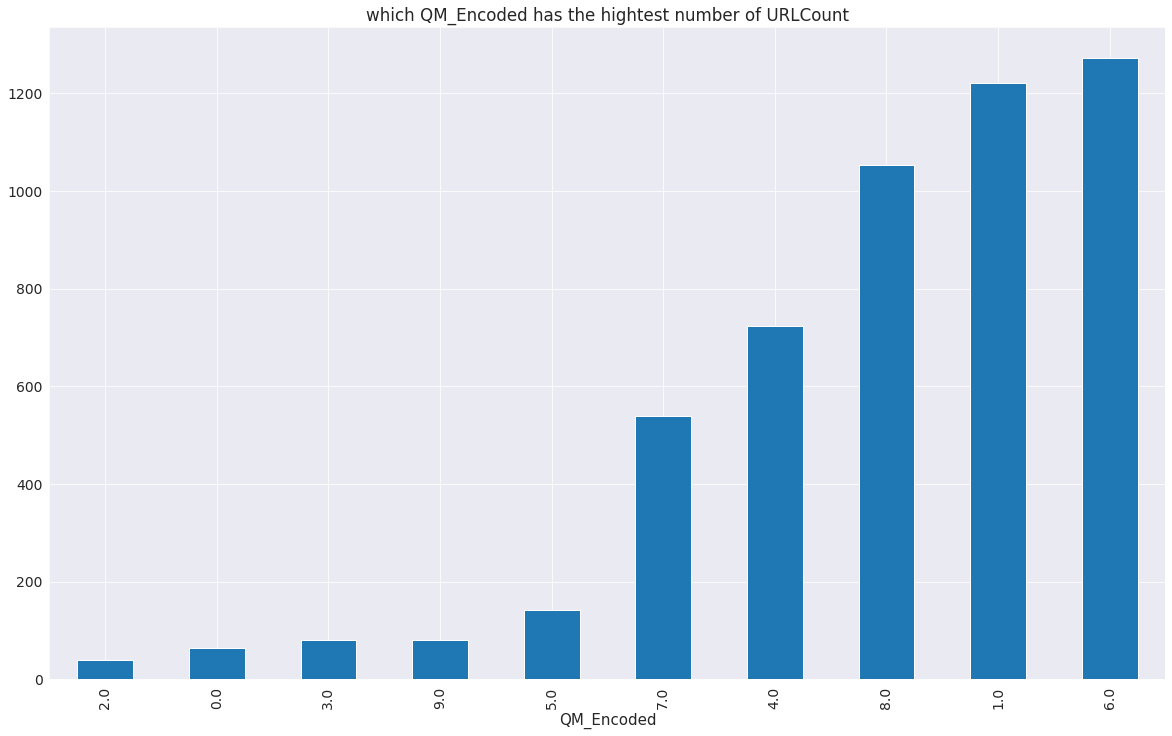

In [121]:
about_qatlqm("URLCount", "QM_Encoded")

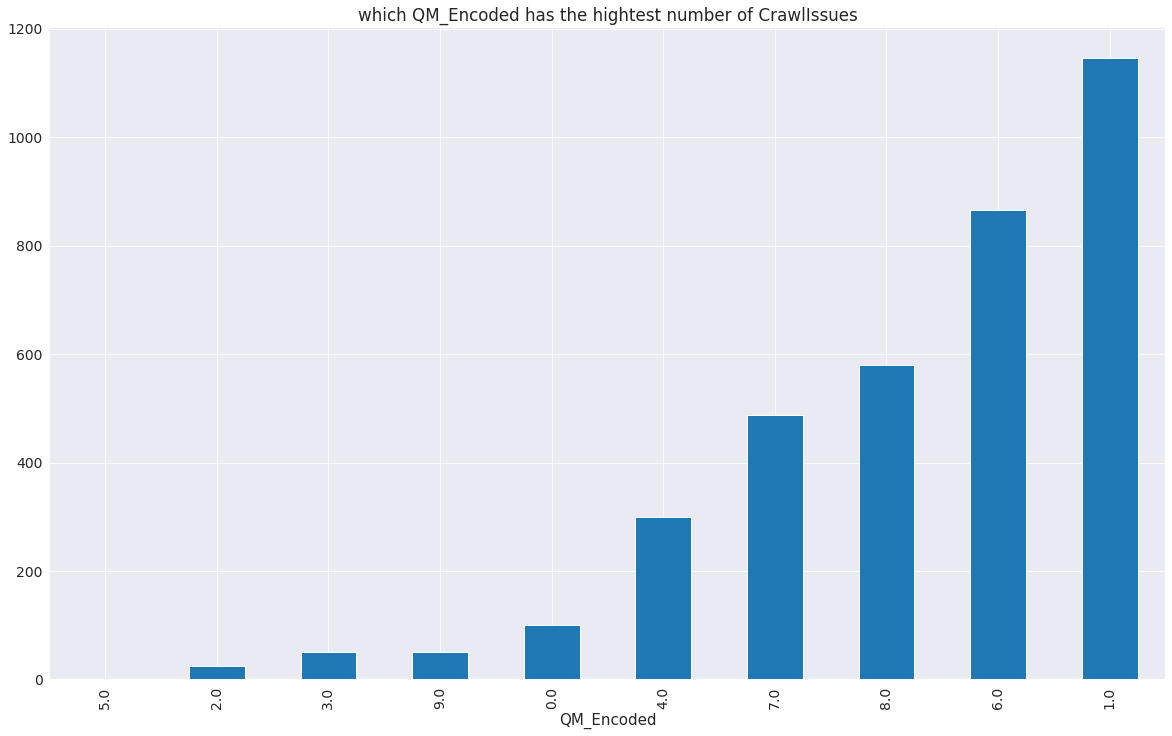

In [122]:
about_qatlqm("CrawlIssues", "QM_Encoded")

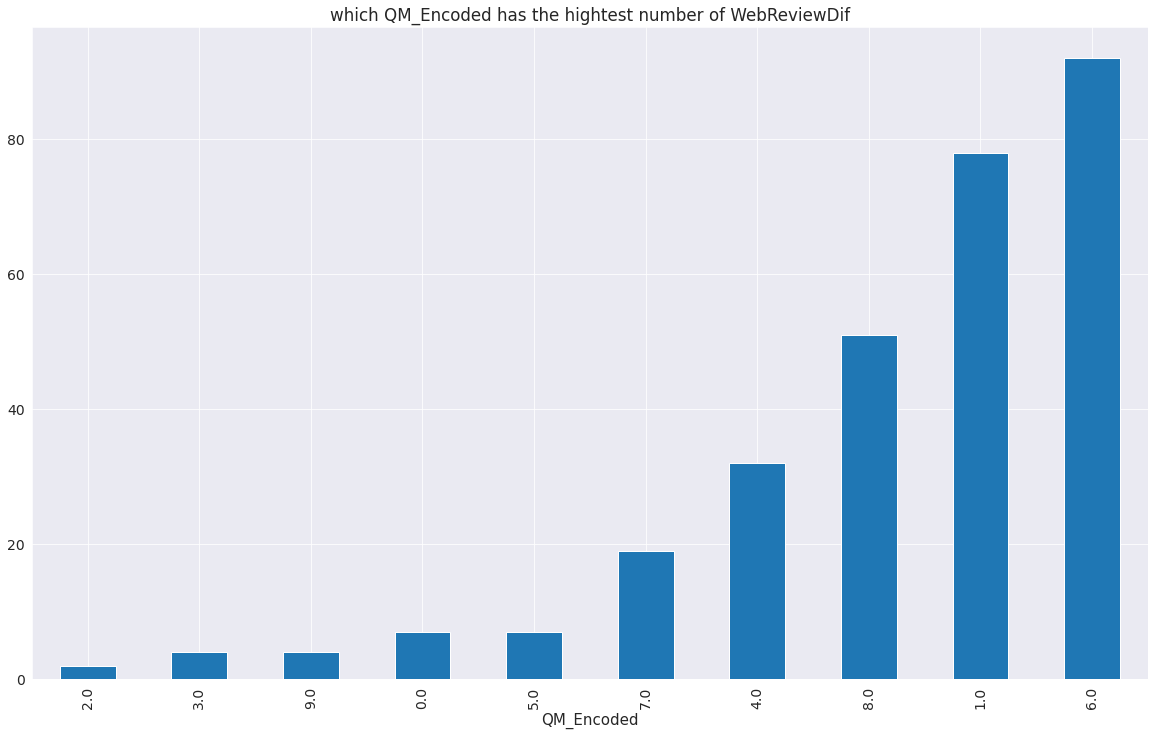

In [124]:
about_qatlqm("WebReviewDif", "QM_Encoded")

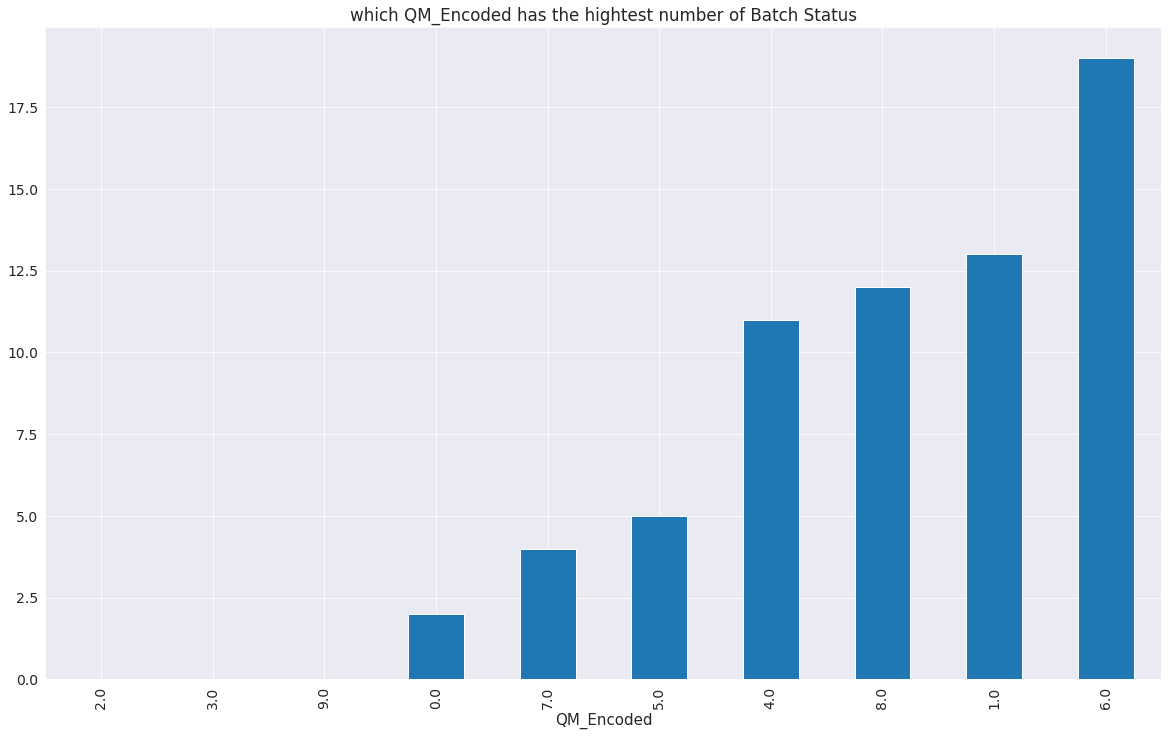

In [125]:
about_qatlqm("Batch Status", "QM_Encoded")

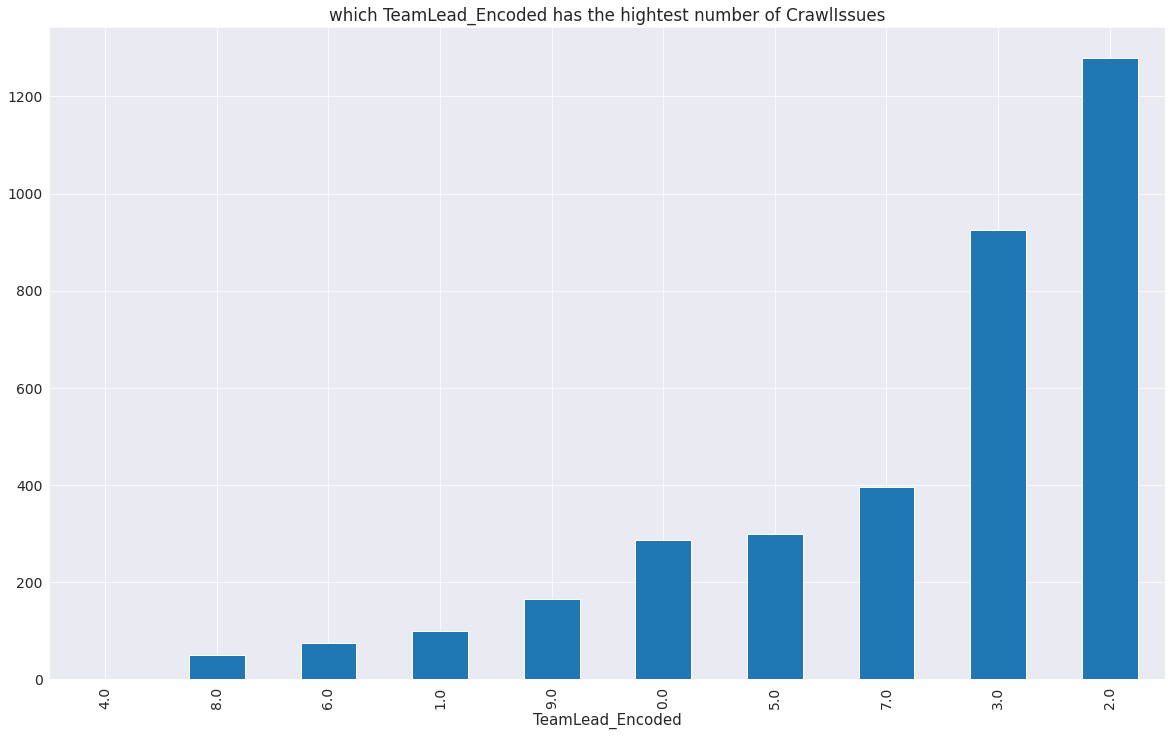

In [128]:
about_qatlqm("CrawlIssues", "TeamLead_Encoded")

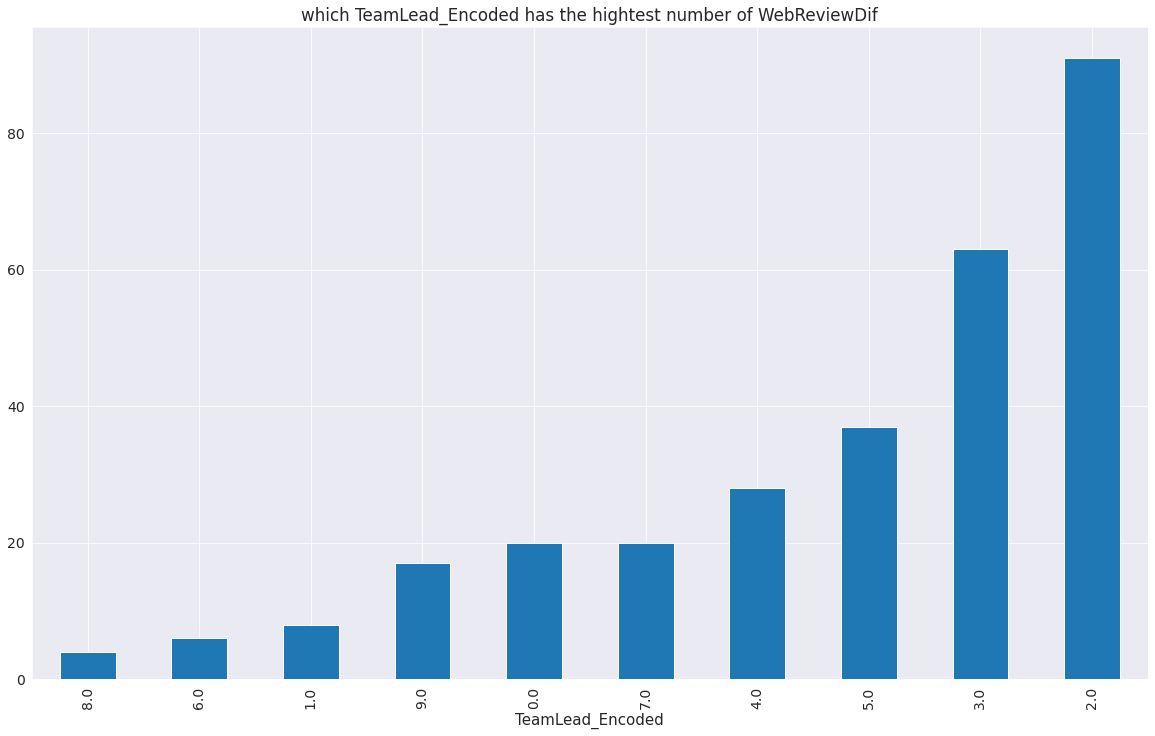

In [129]:
about_qatlqm("WebReviewDif", "TeamLead_Encoded")

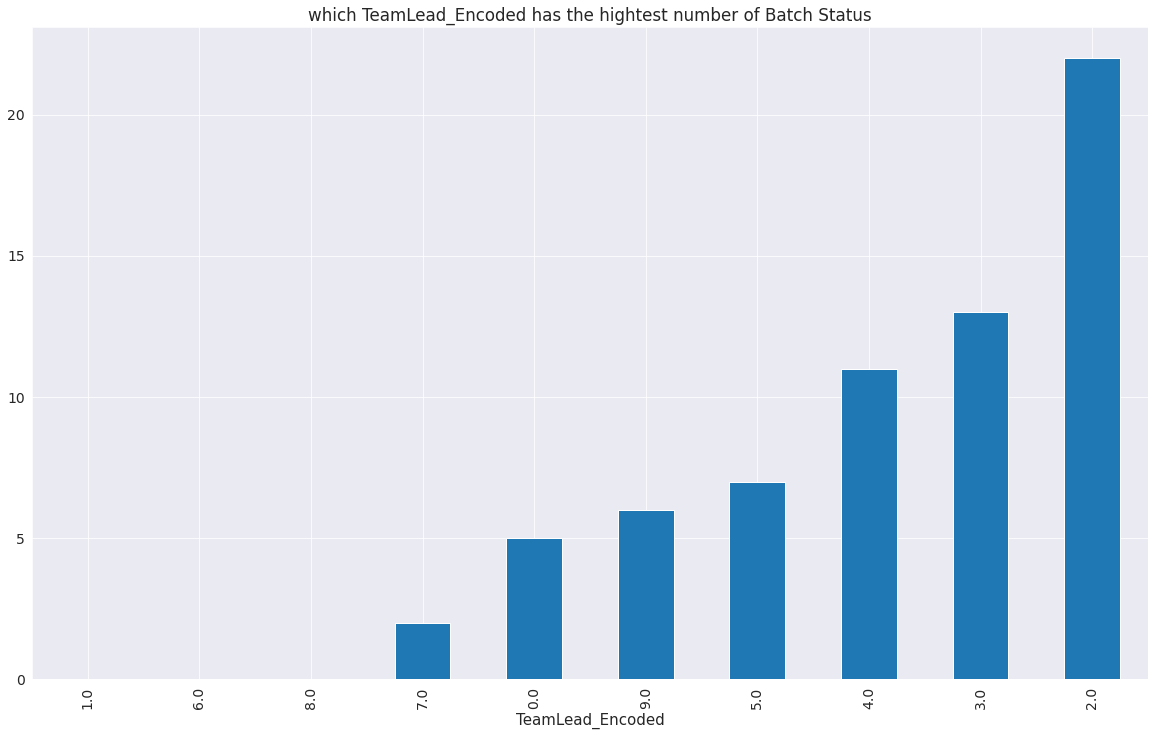

In [130]:
about_qatlqm("Batch Status", "TeamLead_Encoded")

## Multivariaty analysis

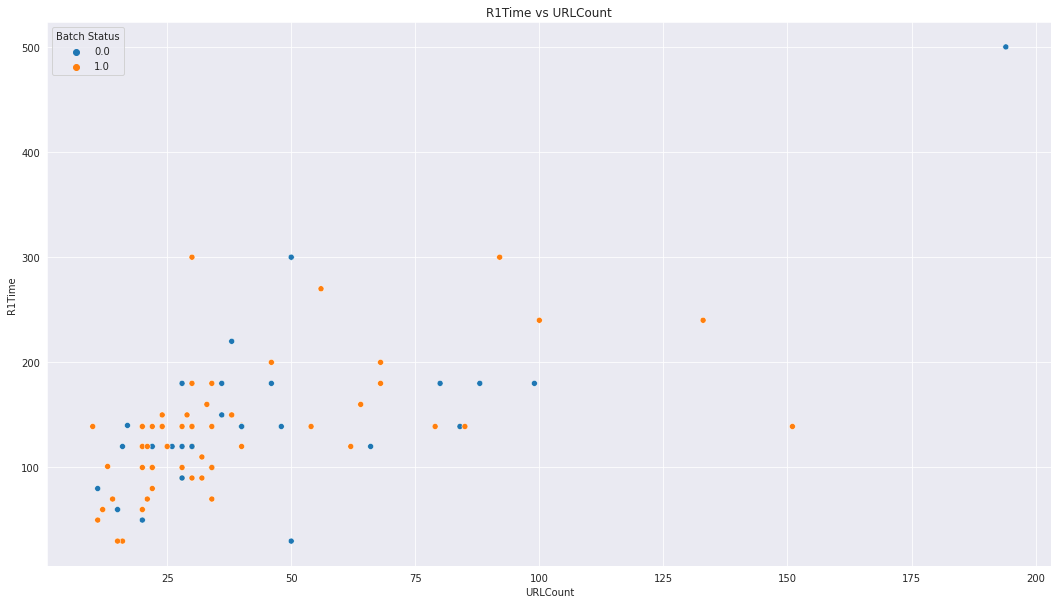

In [151]:
plt.figure(figsize=(18,10))
sns.scatterplot(data=df, x="URLCount", y="R1Time", hue="Batch Status")
plt.title("R1Time vs URLCount")
plt.show()

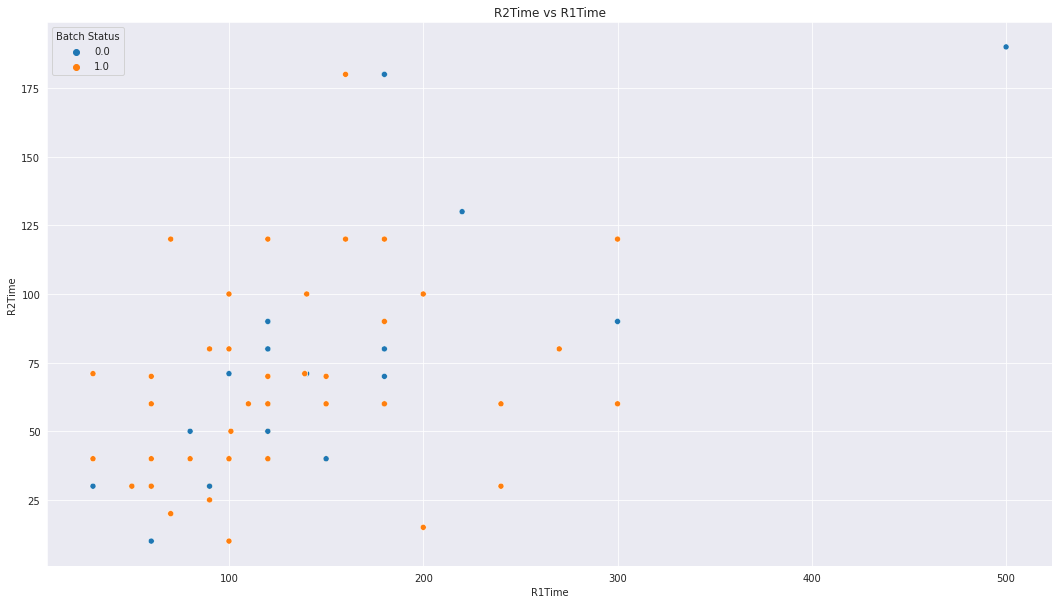

In [153]:
plt.figure(figsize=(18,10))
sns.scatterplot(data=df, x="R1Time", y="R2Time", hue="Batch Status")
plt.title("R2Time vs R1Time")
plt.show()

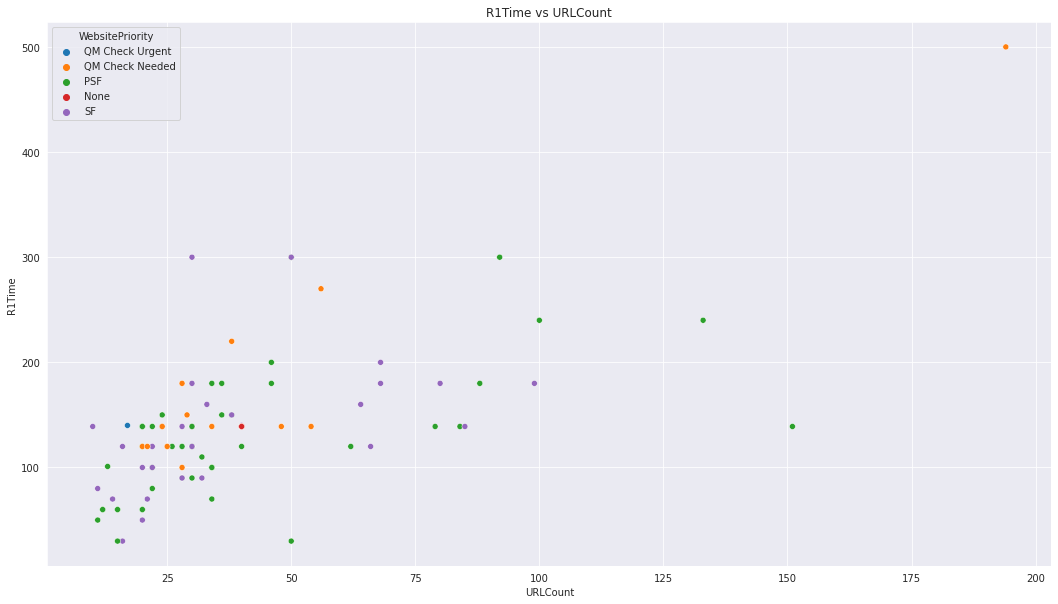

In [157]:
plt.figure(figsize=(18,10))
sns.scatterplot(data=df, x="URLCount", y="R1Time", hue="WebsitePriority")
plt.title("R1Time vs URLCount")
plt.show()

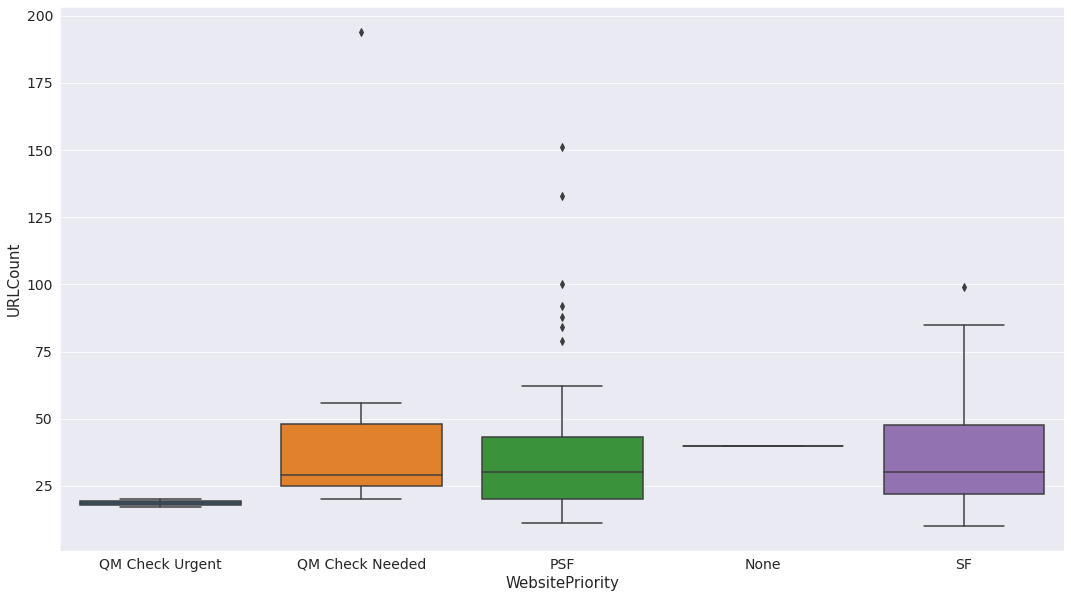

In [211]:
plt.figure(figsize=(18,10))
#plt.title("URLCount vs R1Time", fontsize=12)
sns.boxplot(y='URLCount', x='WebsitePriority', data=df)
plt.show()

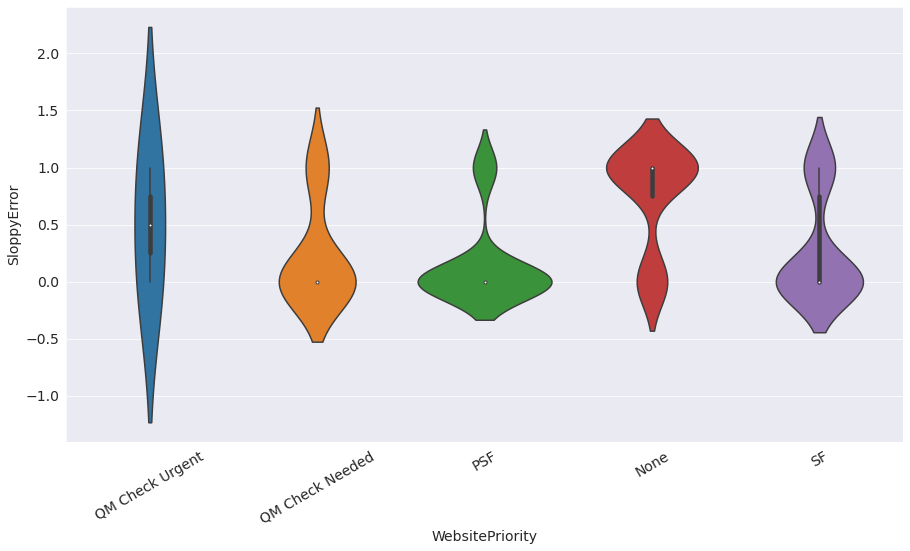

In [10]:
plt.figure(figsize=(15, 8))
ax = sns.violinplot(x="WebsitePriority", y="SloppyError", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()

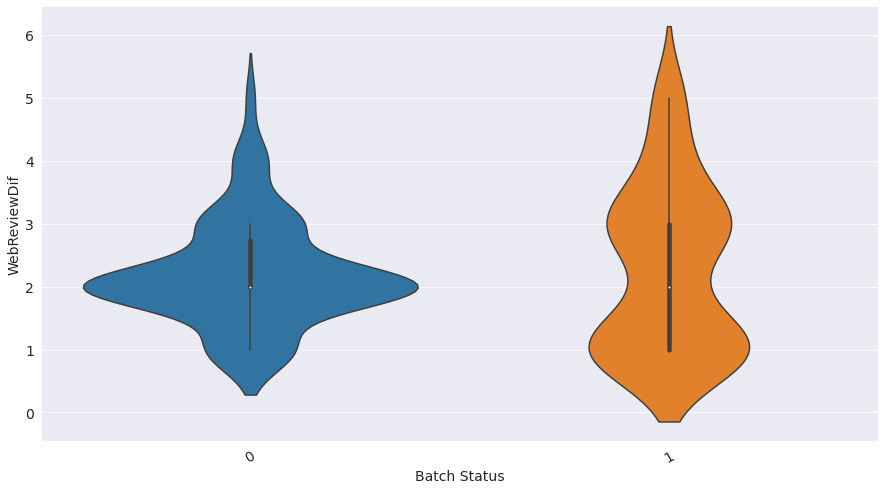

In [13]:
plt.figure(figsize=(15, 8))
plot = sns.violinplot(x="Batch Status", y="WebReviewDif", data=df)
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
plt.show()

In [20]:
# matrix correlation
corr_matrix = df.corr()

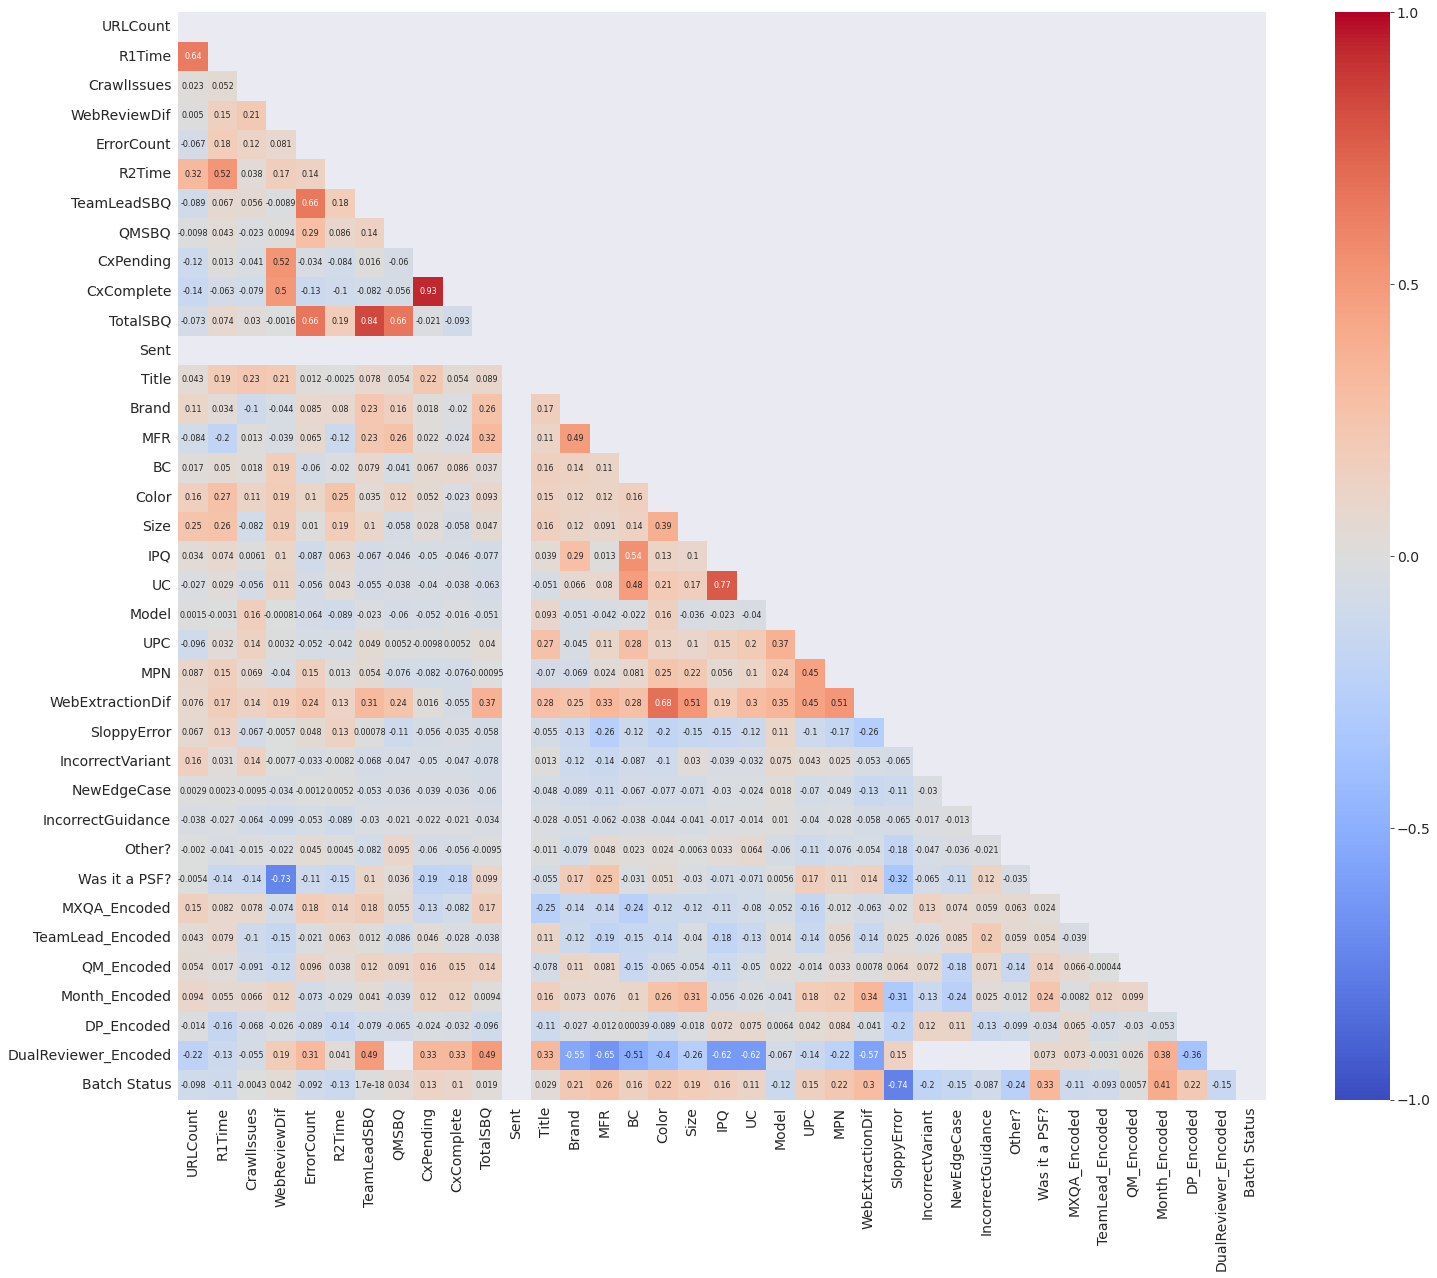

In [21]:
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(25,20))

heatmap = sns.heatmap(corr_matrix, 
                      cmap="coolwarm",
                      mask =mask,
                      square=True,
                      cbar_kws = {"ticks": [-1, -0.5, 0, 0.5, 1]},
                      vmin=-1,
                      vmax=1,
                      annot=True, 
                      annot_kws = {"size": 8})


plt.savefig("images/heatmap.png")
plt.show()

In [15]:
df.groupby("MXQA_Encoded")[["Batch Status"]].mean()

Batch Status
MXQA_Encoded              
0.0               1.000000
1.0               0.000000
2.0               0.500000
3.0               0.000000
4.0               1.000000
5.0               0.750000
6.0               0.250000
7.0               0.000000
8.0               0.700000
9.0               0.600000
11.0              0.166667
12.0              0.000000
13.0              0.857143
14.0              1.000000
15.0              0.666667
16.0              0.200000
17.0              0.000000
18.0              0.600000
19.0              0.000000
21.0              0.000000
22.0              0.000000
23.0              0.666667
24.0              0.000000
25.0              0.000000
26.0              0.571429
27.0              0.000000
28.0              0.000000
29.0              0.400000
30.0              0.000000
31.0              0.750000
32.0              1.000000
33.0              0.333333
34.0              0.500000
36.0              0.000000
37.0              1.000000
38.0              0.000000
39.0              0.571429
40.0              0.000000
41.0              0.000000
42.0              1.000000

# Final Dataset 

In [4]:
df_final = df.drop(columns=["WebReviewDif", "DateReceived", "ErrorCount", "Title", "Brand", "MFR", "BC", "Color", "Size", "IPQ", "UC", "UC", 
                            "Model", "UPC", "MPN", "Website", "DateSent", "SloppyError", "IncorrectVariant", "NewEdgeCase", "IncorrectGuidance", "Other?", "Was it a PSF?"])

In [5]:
# convert the missing values in 0 and the contrary in 1
df_final.DualReviewer_Encoded = df_final.DualReviewer_Encoded.notnull()
df_final.DualReviewer_Encoded = df_final.DualReviewer_Encoded.astype(int)

In [6]:
df_final[df_final["TeamLead_Encoded"] == 8.0]

URLCount  R1Time  CrawlIssues WebsitePriority  R2Time  TeamLeadSBQ  QMSBQ  \
37        40     139           25            None      71            0      0   
91        40     139           25            None      71            0      0   

    CxPending  CxComplete  TotalSBQ  Sent  WebExtractionDif  MXQA_Encoded  \
37      False       False         0  True               1.0          11.0   
91      False       False         0  True               1.0          41.0   

    TeamLead_Encoded  QM_Encoded  Month_Encoded  DP_Encoded  \
37               8.0         1.0            1.0         7.0   
91               8.0         9.0            4.0         6.0   

    DualReviewer_Encoded  Batch Status  
37                     0             0  
91                     0             0

In [7]:
df_final[df_final["TeamLead_Encoded"].isnull()]

URLCount  R1Time  CrawlIssues WebsitePriority  R2Time  TeamLeadSBQ  QMSBQ  \
27        40     139           25            None      71            0      0   

    CxPending  CxComplete  TotalSBQ  Sent  WebExtractionDif  MXQA_Encoded  \
27      False       False         0  True               1.0          41.0   

    TeamLead_Encoded  QM_Encoded  Month_Encoded  DP_Encoded  \
27               NaN         1.0            0.0        10.0   

    DualReviewer_Encoded  Batch Status  
27                     0             0

In [8]:
df_final.TeamLead_Encoded = df_final.TeamLead_Encoded.fillna(8.0)

In [ ]:
# rellenar de acuerdo al mxqa del equipo que pertenece 
# PSF

In [9]:
# convert the bool variables in 1 and 0 
df_final.CxPending = df_final.CxPending.astype(int)
df_final.CxComplete = df_final.CxComplete.astype(int)
df_final.Sent = df_final.Sent.astype(int)df.groupby("MXQA_Encoded")[["Batch Status"]].mean()

In [10]:
# create the list with the variables to make one hot encodig
columns_encoding = ["WebsitePriority"]

In [11]:
#checar con el modelo 

In [12]:
# create the categorical variables as dummies 
df_ffmodel = pd.get_dummies(df_final, columns=columns_encoding, drop_first=True)

In [13]:
df_ffmodel.head()

URLCount  R1Time  CrawlIssues  R2Time  TeamLeadSBQ  QMSBQ  CxPending  \
0        17     140          100      71            0      0          1   
1       194     500            0     190            0      0          0   
2        30      90            0      30            0      0          0   
3        20     120            0      70            1      0          0   
4        40     139           25      71            0      0          0   

   CxComplete  TotalSBQ  Sent  ...  TeamLead_Encoded  QM_Encoded  \
0           1         0     1  ...               2.0         6.0   
1           0         0     1  ...               4.0         6.0   
2           0         0     1  ...               3.0         7.0   
3           0         1     1  ...               3.0         6.0   
4           0         0     1  ...               3.0         1.0   

   Month_Encoded  DP_Encoded  DualReviewer_Encoded  Batch Status  \
0            3.0         2.0                     1             0   
1            3.0         7.0                     0             0   
2            3.0         8.0                     0             1   
3            2.0         8.0                     0             1   
4            0.0         2.0                     0             0   

   WebsitePriority_PSF  WebsitePriority_QM Check Needed  \
0                    0                                0   
1                    0                                1   
2                    1                                0   
3                    1                                0   
4                    0                                0   

   WebsitePriority_QM Check Urgent  WebsitePriority_SF  
0                                1                   0  
1                                0                   0  
2                                0                   0  
3                                0                   0  
4                                0                   0  

[5 rows x 22 columns]

In [14]:
df_ffmodel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   URLCount                         132 non-null    int64  
 1   R1Time                           132 non-null    int64  
 2   CrawlIssues                      132 non-null    int64  
 3   R2Time                           132 non-null    int64  
 4   TeamLeadSBQ                      132 non-null    int64  
 5   QMSBQ                            132 non-null    int64  
 6   CxPending                        132 non-null    int64  
 7   CxComplete                       132 non-null    int64  
 8   TotalSBQ                         132 non-null    int64  
 9   Sent                             132 non-null    int64  
 10  WebExtractionDif                 132 non-null    float64
 11  MXQA_Encoded                     132 non-null    float64
 12  TeamLead_Encoded      

In [345]:
# Target variable
target_var = df_ffmodel["Batch Status"]

In [351]:
# Train and Test Set of .9 y .1 respectively 
data_train, data_test, target_train, target_test = train_test_split(df_ffmodel,
                                                    target_var,
                                                   test_size = 0.1,
                                                   random_state = 7)

In [354]:
df_ffmodel.to_csv("final_dataset.csv")